<a href="https://colab.research.google.com/github/nsy033/CS376_TEAM16/blob/master/Team16_Final_CRNN_result_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***CS376* Machine Learning Final Project**

**Title** |  Music mood tagging model with multi label classification using music feature data and pre-labeled data

----

    Team 16
    20190432 윤태양 Taeyang Yoon
    20190606 정재령 Jaeryung Chung
    20190656 최승연 Seungyeon Choi

###Basic Setup

#####Install required packages.

In [ ]:
# Check Colab System Spec.
!cat /etc/issue.net       # Colab OS
!head /proc/cpuinfo       # Colab CPU
!head -n 3 /proc/meminfo  # Memory Spec.
!df -h                    # Disk Spec.
!pwd                      # Current Directory

Ubuntu 18.04.5 LTS
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
MemTotal:       26692024 kB
MemFree:        24127756 kB
MemAvailable:   25787168 kB
Filesystem      Size  Used Avail Use% Mounted on
overlay         226G   39G  188G  17% /
tmpfs            64M     0   64M   0% /dev
shm              13G     0   13G   0% /dev/shm
/dev/root       2.0G  1.2G  812M  59% /sbin/docker-init
tmpfs            13G   28K   13G   1% /var/colab
/dev/sda1       233G   41G  192G  18% /etc/hosts
tmpfs            13G     0   13G   0% /proc/acpi
tmpfs            13G     0   13G   0% /proc/scsi
tmpfs            13G     0   13G   0% /sys/firmware
/content


In [ ]:
# Install Required packages
!pip install audioread
!pip install essentia
!pip install fire
!pip install grpcio
!pip install h5py
!pip install librosa
!pip install llvmlite
!pip install matplotlib
!pip install numba
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy
!pip install six
!pip install SoundFile
!pip install sox
!pip install tensorboard
!pip install tensorflow-estimator
!pip install termcolor
!pip install torch
!pip install torchaudio
!pip install tqdm

!apt install ffmpeg
!pip install -q https://github.com/tugstugi/dl-colab-notebooks/archive/colab_utils.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.6 MB 9.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=443a3f0002930170649ce30304b0c103e8533290ab2a1243039dcc19c310c94d
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in

#####Import necessary libraries.

In [ ]:
# Setup Dependency
import os
import sys
import numpy as np
import pandas as pd
import zipfile
import math
import matplotlib.pyplot as plt
import random
import collections
import zipfile
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from scipy.special import softmax
from scipy.stats import rankdata

import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

# preprocessing/mtat_read.py
import glob
import librosa
import fire
import tqdm

# training/main.py
import argparse
import time
import datetime
import tqdm
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from torch.utils.tensorboard import SummaryWriter

# training/data_loader
import pickle
import csv
from torch.utils import data
from sklearn.preprocessing import LabelBinarizer

# prediction
from IPython.display import Audio, display, clear_output
from scipy.io import wavfile
from dl_colab_notebooks.audio import record_audio, upload_audio

###Source Data Setup

##### Methods for mount and download

In [ ]:
from google.colab import drive
import os
import gdown

def mount_drive(b):
  google_drive_prefix = '/content/drive'
  drive.mount(google_drive_prefix)

  !ls /content/drive/

  folder_directory = '/content/drive/MyDrive/CS376/'

  if not os.path.exists(folder_directory):
    os.mkdir(folder_directory)

  print('Great Job!!!' if os.path.exists(folder_directory) else 'Something wrong. The folder has not yet been created')

def download_src(dataset):
  # https://drive.google.com/uc?id= >>>file id<<<
  if dataset == "audioautix(836)":
    # data-836-001.zip : https://drive.google.com/file/d/1Hr6RkVFlfKoTKw8CqPbjVG-Exe5M5XVW/view?usp=sharing
    # data-836-002.zip : https://drive.google.com/file/d/1lDNASZXh62TM2Z3vN7Rcmf3b0yCVkwmD/view?usp=sharing
    # data-836-003.zip : https://drive.google.com/file/d/1sNai5fRjJE1_8DVlBjLns7NjdtheufDX/view?usp=sharing

    if not os.path.exists(save_path):
      os.makedirs(save_path)
      # !cd /content/drive/MyDrive/
      !gdown https://drive.google.com/uc?id=1Hr6RkVFlfKoTKw8CqPbjVG-Exe5M5XVW
      !gdown https://drive.google.com/uc?id=1lDNASZXh62TM2Z3vN7Rcmf3b0yCVkwmD
      !gdown https://drive.google.com/uc?id=1sNai5fRjJE1_8DVlBjLns7NjdtheufDX
      # print("appending zip files...")
      # os.system('cat {}/audioautix.zip.* > {}/MyDrive.zip'.format(zip_path, zip_path))
      print("unzipping data-836-001.zip...")
      os.system('unzip {} -d {}'.format(os.path.join(zip_path, 'data-836-001.zip'), save_path))
      print("unzipping data-836-002.zip...")
      os.system('unzip {} -d {}'.format(os.path.join(zip_path, 'data-836-002.zip'), save_path))
      print("unzipping data-836-003.zip...")
      os.system('unzip {} -d {}'.format(os.path.join(zip_path, 'data-836-003.zip'), save_path))
      print("Done!!")

  elif dataset == "audioautix+fma(1136, only 46)":
    # data-1136-001.zip : https://drive.google.com/file/d/15tV1N9wqn4mtRuhHaBAZu3HhFXX3FXZP/view?usp=sharing
    # data-1136-002.zip : https://drive.google.com/file/d/1Ko8wAVQy2dMnO7cgUTt8gaXJl3Ww2EzL/view?usp=sharing
    # data-1136-003.zip : https://drive.google.com/file/d/1JOOgEtLOQ4JmHjILTPFCgb6Z8la-VepI/view?usp=sharing
    # data-1136-004.zip : https://drive.google.com/file/d/1d1tK3wi2A4106tNw0ne_uGHAaSd-tt9-/view?usp=sharing

    if not os.path.exists(save_path):
      os.makedirs(save_path)
      # !cd /content/drive/MyDrive/
      !gdown https://drive.google.com/uc?id=15tV1N9wqn4mtRuhHaBAZu3HhFXX3FXZP
      !gdown https://drive.google.com/uc?id=1Ko8wAVQy2dMnO7cgUTt8gaXJl3Ww2EzL
      !gdown https://drive.google.com/uc?id=1JOOgEtLOQ4JmHjILTPFCgb6Z8la-VepI
      !gdown https://drive.google.com/uc?id=1d1tK3wi2A4106tNw0ne_uGHAaSd-tt9-
      # print("appending zip files...")
      # os.system('cat {}/audioautix.zip.* > {}/MyDrive.zip'.format(zip_path, zip_path))
      print("unzipping data-1136-001.zip...")
      os.system('unzip {} -d {}'.format(os.path.join(zip_path, 'data-1136-001.zip'), save_path))
      print("unzipping data-1136-002.zip...")
      os.system('unzip {} -d {}'.format(os.path.join(zip_path, 'data-1136-002.zip'), save_path))
      print("unzipping data-1136-003.zip...")
      os.system('unzip {} -d {}'.format(os.path.join(zip_path, 'data-1136-003.zip'), save_path))
      print("unzipping data-1136-004.zip...")
      os.system('unzip {} -d {}'.format(os.path.join(zip_path, 'data-1136-004.zip'), save_path))
      print("Done!!")
  else :
    print("Sorry, but not ready for other dataset");

#####Mount your google drive, or download pre-made execution environment by our team.

In [ ]:
setup = "download" #@param ["mount", "download"]
dataset = "audioautix(836)" #@param ["audioautix(836)", "audioautix+fma(1136, only 46)"]

zip_path = '/content/'
save_path = os.path.join(zip_path, 'drive', 'MyDrive')

if setup == "mount": 
  mount_drive("")
else:
  download_src(dataset)

Downloading...
From: https://drive.google.com/uc?id=1Hr6RkVFlfKoTKw8CqPbjVG-Exe5M5XVW
To: /content/data-836-001.zip
100% 1.24G/1.24G [00:16<00:00, 75.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lDNASZXh62TM2Z3vN7Rcmf3b0yCVkwmD
To: /content/data-836-002.zip
100% 1.63G/1.63G [00:25<00:00, 63.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sNai5fRjJE1_8DVlBjLns7NjdtheufDX
To: /content/data-836-003.zip
100% 1.64G/1.64G [00:23<00:00, 70.7MB/s]
unzipping data-836-001.zip...
unzipping data-836-002.zip...
unzipping data-836-003.zip...
Done!!


###Preprocess data

Preprocess the audio data, the wav format is recommended because of the resulting npy file size.

If you already have processed npy file in your drive, you can skip this stage.

In [ ]:
# Preprocessing
# preprocessing/mtat_read.py
class Processor:
  def __init__(self):
    self.fs = 16000
    
  def get_paths(self, data_path):
    self.files = glob.glob(os.path.join(data_path, '*.wav'))
    # print(data_path)
    self.npy_path = os.path.join(data_path, 'mtat', 'npy')
    if not os.path.exists(self.npy_path):
      os.makedirs(self.npy_path)
   
  def get_npy(self, fn):
    x, sr = librosa.core.load(fn, sr = self.fs)
    return x
    
  def iterate(self, data_path):
    iter_cnt = 0
    self.get_paths(data_path)
    for fn in tqdm.tqdm(self.files):
      npy_fn = os.path.join(self.npy_path, fn.split('/')[-1][:-3]+'npy')
      if not os.path.exists(npy_fn):
        try:
          x = self.get_npy(fn)
          print(npy_fn)
          np.save(open(npy_fn, 'wb'), x)
        except RuntimeError:
          # some audio files are broken
          print(fn)
          continue

p = Processor()
directory = '/content/drive/MyDrive/CS376/music_src/audionautix/'
p.iterate(directory)

  0%|          | 1/836 [00:02<31:55,  2.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorMusic_29_58.npy


  0%|          | 2/836 [00:03<23:38,  1.70s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RedwoodHighway_58_87.npy


  0%|          | 3/836 [00:04<20:56,  1.51s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FrontPorchSitter_58_87.npy


  0%|          | 4/836 [00:06<19:37,  1.41s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RightOnRedFull_29_58.npy


  1%|          | 5/836 [00:07<18:57,  1.37s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TemptingFate_58_87.npy


  1%|          | 6/836 [00:08<18:25,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HotSalsa_29_58.npy


  1%|          | 7/836 [00:09<18:04,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Cycles_58_87.npy


  1%|          | 8/836 [00:11<18:10,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ForeverBelieve_29_58.npy


  1%|          | 9/836 [00:12<18:00,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EmilyWalksAway_58_87.npy


  1%|          | 10/836 [00:13<17:45,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Wheels_29_58.npy


  1%|▏         | 11/836 [00:15<17:38,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatChildIsThis_58_87.npy


  1%|▏         | 12/836 [00:16<17:30,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GetAMoveOn_29_58.npy


  2%|▏         | 13/836 [00:17<17:26,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HappyUkulele_29_58.npy


  2%|▏         | 14/836 [00:18<17:21,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TimePassingBy.npy


  2%|▏         | 15/836 [00:20<17:20,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HardBounce_58_87.npy


  2%|▏         | 16/836 [00:21<17:21,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HipHopNoVocal_58_87.npy


  2%|▏         | 17/836 [00:22<17:24,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Whatdafunk.npy


  2%|▏         | 18/836 [00:23<17:24,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Alison_58_87.npy


  2%|▏         | 19/836 [00:25<17:25,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HopeAgainstHope_58_87.npy


  2%|▏         | 20/836 [00:26<17:23,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Edward_29_58.npy


  3%|▎         | 21/836 [00:27<17:26,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ZombieRock_58_87.npy


  3%|▎         | 22/836 [00:29<17:28,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigSwingBand.npy


  3%|▎         | 23/836 [00:30<17:31,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatsItToYaPunk.npy


  3%|▎         | 24/836 [00:31<17:21,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ClowningAround_29_58.npy


  3%|▎         | 25/836 [00:32<17:13,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SundaysChild_58_87.npy


  3%|▎         | 26/836 [00:34<17:12,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Boom_29_58.npy


  3%|▎         | 27/836 [00:35<17:09,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Whoopsy.npy


  3%|▎         | 28/836 [00:36<17:10,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HappyLittleElves.npy


  3%|▎         | 29/836 [00:38<17:10,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Delusion32.npy


  4%|▎         | 30/836 [00:39<17:06,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Robin_29_58.npy


  4%|▎         | 31/836 [00:40<17:09,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PanamaHatNV_58_87.npy


  4%|▍         | 32/836 [00:41<17:15,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigBluesBed_58_87.npy


  4%|▍         | 33/836 [00:43<17:15,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatsItToYaPunk_29_58.npy


  4%|▍         | 34/836 [00:44<17:10,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MinorWithCricket_29_58.npy


  4%|▍         | 35/836 [00:45<17:07,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TropicalContact_29_58.npy


  4%|▍         | 36/836 [00:47<17:05,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BoxcarRag_58_87.npy


  4%|▍         | 37/836 [00:48<17:02,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HillbillyBed_58_87.npy


  5%|▍         | 38/836 [00:49<16:58,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoDramatic.npy


  5%|▍         | 39/836 [00:50<16:55,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NightRunner_29_58.npy


  5%|▍         | 40/836 [00:52<16:55,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MajesticPiano.npy


  5%|▍         | 41/836 [00:53<16:54,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Minstrel_29_58.npy


  5%|▌         | 42/836 [00:54<16:52,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AlienSunset.npy


  5%|▌         | 43/836 [00:55<16:50,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RP-InTheField.npy


  5%|▌         | 44/836 [00:57<16:47,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DarkMystery_29_58.npy


  5%|▌         | 45/836 [00:58<16:45,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OpusOne_29_58.npy


  6%|▌         | 46/836 [00:59<16:45,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Minstrel.npy


  6%|▌         | 47/836 [01:01<16:40,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/12Mornings.npy


  6%|▌         | 48/836 [01:02<16:38,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BootsBootsBoots.npy


  6%|▌         | 49/836 [01:03<16:36,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Meditation1.npy


  6%|▌         | 50/836 [01:04<16:43,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheAngelsWeep_29_58.npy


  6%|▌         | 51/836 [01:06<16:49,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BrookersBlues_58_87.npy


  6%|▌         | 52/836 [01:07<16:54,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transition_29_58.npy


  6%|▋         | 53/836 [01:08<16:58,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarshAlienMachine_58_87.npy


  6%|▋         | 54/836 [01:10<17:02,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoloAcoustic3_29_58.npy


  7%|▋         | 55/836 [01:11<17:00,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DogHouse.npy


  7%|▋         | 56/836 [01:12<16:57,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InnerJourney_58_87.npy


  7%|▋         | 57/836 [01:13<16:48,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MedTempoRock_29_58.npy


  7%|▋         | 58/836 [01:15<16:36,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OohHey.npy


  7%|▋         | 59/836 [01:16<16:29,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigBlues_29_58.npy


  7%|▋         | 60/836 [01:17<16:28,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MiddleEarth_58_87.npy


  7%|▋         | 61/836 [01:19<16:22,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CodeBlue_29_58.npy


  7%|▋         | 62/836 [01:20<16:20,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MallWalker.npy


  8%|▊         | 63/836 [01:21<16:15,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Edward_58_87.npy


  8%|▊         | 64/836 [01:22<16:13,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IDontWantToTalk_58_87.npy


  8%|▊         | 65/836 [01:24<16:10,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transcend_58_87.npy


  8%|▊         | 66/836 [01:25<16:10,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AshesOfAnEmpire_29_58.npy


  8%|▊         | 67/836 [01:26<16:12,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ohm.npy


  8%|▊         | 68/836 [01:27<16:12,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ADarkerHeart_58_87.npy


  8%|▊         | 69/836 [01:29<16:15,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigBlues.npy


  8%|▊         | 70/836 [01:30<16:11,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TicketToNowhereMan.npy


  8%|▊         | 71/836 [01:31<16:09,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PanamaHatNV.npy


  9%|▊         | 72/836 [01:32<16:06,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ChecksForFree.npy


  9%|▊         | 73/836 [01:34<16:07,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/90SecondsOfFunk_29_58.npy


  9%|▉         | 74/836 [01:35<16:02,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ectoplasm_58_87.npy


  9%|▉         | 75/836 [01:36<16:01,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Azimuth_58_87.npy


  9%|▉         | 76/836 [01:37<16:02,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Lexicon.npy


  9%|▉         | 77/836 [01:39<16:06,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/JoyToTheWorld_58_87.npy


  9%|▉         | 78/836 [01:40<16:04,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transition_58_87.npy


  9%|▉         | 79/836 [01:41<16:00,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Jellyfish.npy


 10%|▉         | 80/836 [01:43<15:56,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MediumRock.npy


 10%|▉         | 81/836 [01:44<15:52,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GoNotGently_29_58.npy


 10%|▉         | 82/836 [01:45<15:53,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Metaphor.npy


 10%|▉         | 83/836 [01:46<15:48,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarshAlienMachine_29_58.npy


 10%|█         | 84/836 [01:48<15:44,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OccupyTheDanceFloor_58_87.npy


 10%|█         | 85/836 [01:49<15:42,  1.25s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Words_29_58.npy


 10%|█         | 86/836 [01:50<15:40,  1.25s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Essence.npy


 10%|█         | 87/836 [01:51<15:43,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MinorWithCricket_58_87.npy


 11%|█         | 88/836 [01:53<15:41,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheVisitors_29_58.npy


 11%|█         | 89/836 [01:54<15:42,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LineOfFire_29_58.npy


 11%|█         | 90/836 [01:55<15:44,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DatGroove_58_87.npy


 11%|█         | 91/836 [01:56<15:40,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernRockBoy_29_58.npy


 11%|█         | 92/836 [01:58<15:40,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ISawThreeShips.npy


 11%|█         | 93/836 [01:59<15:37,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LongLiveDeath.npy


 11%|█         | 94/836 [02:00<15:36,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GroovyBaby_58_87.npy


 11%|█▏        | 95/836 [02:01<15:39,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TrippinCoffee_58_87.npy


 11%|█▏        | 96/836 [02:03<15:45,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SundaysChild.npy


 12%|█▏        | 97/836 [02:04<15:42,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ForestRhythm_58_87.npy


 12%|█▏        | 98/836 [02:05<15:42,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelGoodRock.npy


 12%|█▏        | 99/836 [02:07<15:52,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheChildrensRoom_29_58.npy


 12%|█▏        | 100/836 [02:08<15:50,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CoolRide.npy


 12%|█▏        | 101/836 [02:09<15:44,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ion_29_58.npy


 12%|█▏        | 102/836 [02:11<15:45,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheMaster_29_58.npy


 12%|█▏        | 103/836 [02:12<15:45,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DarkMystery.npy


 12%|█▏        | 104/836 [02:13<15:40,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Countermove_29_58.npy


 13%|█▎        | 105/836 [02:14<15:37,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Hoedown_29_58.npy


 13%|█▎        | 106/836 [02:16<15:33,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TrapBed_58_87.npy


 13%|█▎        | 107/836 [02:17<15:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GoNotGently_58_87.npy


 13%|█▎        | 108/836 [02:18<15:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarkTheHeraldAngelsSing_58_87.npy


 13%|█▎        | 109/836 [02:19<15:27,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MediumRock_58_87.npy


 13%|█▎        | 110/836 [02:21<15:22,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelGoodRock_58_87.npy


 13%|█▎        | 111/836 [02:22<15:19,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AlienSunset_29_58.npy


 13%|█▎        | 112/836 [02:23<15:24,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EpicSeries_58_87.npy


 14%|█▎        | 113/836 [02:25<15:21,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/12Mornings_29_58.npy


 14%|█▎        | 114/836 [02:26<15:19,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Essence2_58_87.npy


 14%|█▍        | 115/836 [02:27<15:19,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BustinLoose.npy


 14%|█▍        | 116/836 [02:28<15:18,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/JumpinBoogieWoogie_58_87.npy


 14%|█▍        | 117/836 [02:30<15:33,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernRock2_58_87.npy


 14%|█▍        | 118/836 [02:31<15:25,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Rockytop_58_87.npy


 14%|█▍        | 119/836 [02:32<15:16,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatChildIsThis_29_58.npy


 14%|█▍        | 120/836 [02:34<15:12,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transition.npy


 14%|█▍        | 121/836 [02:35<15:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TrippinCoffee_29_58.npy


 15%|█▍        | 122/836 [02:36<15:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Algorithm_58_87.npy


 15%|█▍        | 123/836 [02:37<15:04,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Azimuth_29_58.npy


 15%|█▍        | 124/836 [02:39<15:04,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HillbillyBed.npy


 15%|█▍        | 125/836 [02:40<15:02,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ThePlumbersRag.npy


 15%|█▌        | 126/836 [02:41<15:28,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LionsHeart.npy


 15%|█▌        | 127/836 [02:43<16:06,  1.36s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigCarTheft.npy


 15%|█▌        | 128/836 [02:44<17:22,  1.47s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OnWaldenPond.npy


 15%|█▌        | 129/836 [02:46<18:07,  1.54s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TroubledBridges_29_58.npy


 16%|█▌        | 130/836 [02:48<17:29,  1.49s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FatCaps_29_58.npy


 16%|█▌        | 131/836 [02:49<16:42,  1.42s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheBigHouse_29_58.npy


 16%|█▌        | 132/836 [02:50<16:08,  1.38s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Roboskater.npy


 16%|█▌        | 133/836 [02:51<15:44,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PanamaHat_29_58.npy


 16%|█▌        | 134/836 [02:53<16:24,  1.40s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MarathonMan_58_87.npy


 16%|█▌        | 135/836 [02:54<16:33,  1.42s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Pentagram_29_58.npy


 16%|█▋        | 136/836 [02:56<15:59,  1.37s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PennyWhistle_58_87.npy


 16%|█▋        | 137/836 [02:57<15:33,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Drifting2_58_87.npy


 17%|█▋        | 138/836 [02:58<15:56,  1.37s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MegatonDrop_58_87.npy


 17%|█▋        | 139/836 [03:00<17:01,  1.47s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ectoplasm.npy


 17%|█▋        | 140/836 [03:02<17:23,  1.50s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Pyramids_58_87.npy


 17%|█▋        | 141/836 [03:03<17:17,  1.49s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeavyDrumsBass_29_58.npy


 17%|█▋        | 142/836 [03:04<16:39,  1.44s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorEpic_58_87.npy


 17%|█▋        | 143/836 [03:06<16:08,  1.40s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OphelieasBlues_29_58.npy


 17%|█▋        | 144/836 [03:07<15:47,  1.37s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/12Mornings_58_87.npy


 17%|█▋        | 145/836 [03:08<15:32,  1.35s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HighTension_58_87.npy


 17%|█▋        | 146/836 [03:10<15:23,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/VforVictory_58_87.npy


 18%|█▊        | 147/836 [03:11<15:15,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/UnitedWeGroove_29_58.npy


 18%|█▊        | 148/836 [03:12<15:05,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DestinationUnknown.npy


 18%|█▊        | 149/836 [03:13<14:54,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TriumphantReturn_29_58.npy


 18%|█▊        | 150/836 [03:15<14:50,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IceCold_29_58.npy


 18%|█▊        | 151/836 [03:16<14:46,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IceCold_58_87.npy


 18%|█▊        | 152/836 [03:17<14:43,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticRock_29_58.npy


 18%|█▊        | 153/836 [03:19<14:39,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Metaphor_58_87.npy


 18%|█▊        | 154/836 [03:20<14:42,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Rockytop.npy


 19%|█▊        | 155/836 [03:21<14:41,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheContract.npy


 19%|█▊        | 156/836 [03:23<14:44,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OceanFloor_29_58.npy


 19%|█▉        | 157/836 [03:24<14:45,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HappyUkulele.npy


 19%|█▉        | 158/836 [03:25<14:51,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TennesseeHayride_29_58.npy


 19%|█▉        | 159/836 [03:26<14:54,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarshAlienMachine.npy


 19%|█▉        | 160/836 [03:28<14:47,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ADarkerHeart.npy


 19%|█▉        | 161/836 [03:29<14:42,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Marauder_29_58.npy


 19%|█▉        | 162/836 [03:30<14:37,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PinksGlass_29_58.npy


 19%|█▉        | 163/836 [03:32<14:29,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeadingWest_58_87.npy


 20%|█▉        | 164/836 [03:33<14:22,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InTheField_58_87.npy


 20%|█▉        | 165/836 [03:34<14:22,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Meditation1_58_87.npy


 20%|█▉        | 166/836 [03:35<14:22,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OneFineDay.npy


 20%|█▉        | 167/836 [03:37<14:18,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/VforVictory_29_58.npy


 20%|██        | 168/836 [03:38<14:12,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CarolOfTheBells_58_87.npy


 20%|██        | 169/836 [03:39<14:10,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OphelieasBlues_58_87.npy


 20%|██        | 170/836 [03:41<14:11,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AViewFromEarth.npy


 20%|██        | 171/836 [03:42<14:10,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Roboskater_58_87.npy


 21%|██        | 172/836 [03:43<14:30,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BanjoHop_29_58.npy


 21%|██        | 173/836 [03:45<14:44,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FolkBed_58_87.npy


 21%|██        | 174/836 [03:46<14:29,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LeavinTheLights_29_58.npy


 21%|██        | 175/836 [03:47<14:17,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PendulumWaltz_58_87.npy


 21%|██        | 176/836 [03:48<14:08,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticGuitar1.npy


 21%|██        | 177/836 [03:50<14:01,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheVisitors.npy


 21%|██▏       | 178/836 [03:51<13:58,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Namaste_29_58.npy


 21%|██▏       | 179/836 [03:52<13:57,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IntenseSuspense_29_58.npy


 22%|██▏       | 180/836 [03:53<13:53,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PinksGlass_58_87.npy


 22%|██▏       | 181/836 [03:55<13:52,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EmilyWalksAway.npy


 22%|██▏       | 182/836 [03:56<13:53,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Don'tStop_29_58.npy


 22%|██▏       | 183/836 [03:57<13:55,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticGuitar1_58_87.npy


 22%|██▏       | 184/836 [03:59<14:12,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Continuum.npy


 22%|██▏       | 185/836 [04:00<14:19,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Plantation_29_58.npy


 22%|██▏       | 186/836 [04:01<14:23,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Renaissance_58_87.npy


 22%|██▏       | 187/836 [04:03<14:11,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigSwingBand_58_87.npy


 22%|██▏       | 188/836 [04:04<14:04,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/5CentsBack.npy


 23%|██▎       | 189/836 [04:05<13:58,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GrandeVista_29_58.npy


 23%|██▎       | 190/836 [04:07<13:55,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Lexicon_29_58.npy


 23%|██▎       | 191/836 [04:08<13:52,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Minstrel_58_87.npy


 23%|██▎       | 192/836 [04:09<13:49,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PaperWings.npy


 23%|██▎       | 193/836 [04:10<13:49,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CopAFeel_58_87.npy


 23%|██▎       | 194/836 [04:12<13:54,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RiverMeditation_58_87.npy


 23%|██▎       | 195/836 [04:13<13:53,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LightningBugs.npy


 23%|██▎       | 196/836 [04:14<13:51,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LandrasDream_58_87.npy


 24%|██▎       | 197/836 [04:16<13:48,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ForestRhythm_29_58.npy


 24%|██▎       | 198/836 [04:17<13:42,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AwayInAManger_58_87.npy


 24%|██▍       | 199/836 [04:18<13:35,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Boom_58_87.npy


 24%|██▍       | 200/836 [04:19<13:32,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OkeyDokeySmokey.npy


 24%|██▍       | 201/836 [04:21<13:30,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigSwingBand_29_58.npy


 24%|██▍       | 202/836 [04:22<13:29,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatsItToYaPunk_58_87.npy


 24%|██▍       | 203/836 [04:23<13:27,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DirtRoadTraveler.npy


 24%|██▍       | 204/836 [04:25<13:31,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ZombieRock.npy


 25%|██▍       | 205/836 [04:26<13:34,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AmazingGrace_58_87.npy


 25%|██▍       | 206/836 [04:27<13:32,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Clouds_29_58.npy


 25%|██▍       | 207/836 [04:28<13:29,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Top40Rap.npy


 25%|██▍       | 208/836 [04:30<13:24,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DanceDubber_29_58.npy


 25%|██▌       | 209/836 [04:31<13:20,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PanamaHat.npy


 25%|██▌       | 210/836 [04:32<13:20,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticBlues_58_87.npy


 25%|██▌       | 211/836 [04:33<13:17,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EpicTVTheme_29_58.npy


 25%|██▌       | 212/836 [04:35<13:21,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Namaste.npy


 25%|██▌       | 213/836 [04:36<13:17,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FurElise.npy


 26%|██▌       | 214/836 [04:37<13:15,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Countermove_58_87.npy


 26%|██▌       | 215/836 [04:39<13:10,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InnerJourney_29_58.npy


 26%|██▌       | 216/836 [04:40<13:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/5CentsBack_58_87.npy


 26%|██▌       | 217/836 [04:41<13:04,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DownTheWay_29_58.npy


 26%|██▌       | 218/836 [04:42<13:05,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AViewFromEarth_58_87.npy


 26%|██▌       | 219/836 [04:44<13:06,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Essence_29_58.npy


 26%|██▋       | 220/836 [04:45<13:02,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WarfareBed_58_87.npy


 26%|██▋       | 221/836 [04:46<12:58,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ectoplasm_29_58.npy


 27%|██▋       | 222/836 [04:47<12:54,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BustinLooseWLead_58_87.npy


 27%|██▋       | 223/836 [04:49<12:52,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MidnightClearEDM.npy


 27%|██▋       | 224/836 [04:50<12:50,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Crushin_29_58.npy


 27%|██▋       | 225/836 [04:51<12:51,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BrookersBlues_29_58.npy


 27%|██▋       | 226/836 [04:52<12:49,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Jellyfish_58_87.npy


 27%|██▋       | 227/836 [04:54<12:51,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MovieTheme1_58_87.npy


 27%|██▋       | 228/836 [04:55<12:53,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InTheField.npy


 27%|██▋       | 229/836 [04:56<12:52,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MovieTheme1.npy


 28%|██▊       | 230/836 [04:58<12:51,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TubaWaddle.npy


 28%|██▊       | 231/836 [04:59<12:52,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BackToTheWood.npy


 28%|██▊       | 232/836 [05:00<12:51,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PanamaHat_58_87.npy


 28%|██▊       | 233/836 [05:01<12:53,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ActThree.npy


 28%|██▊       | 234/836 [05:03<12:56,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AllGoodInTheWood.npy


 28%|██▊       | 235/836 [05:04<12:52,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Horror13.npy


 28%|██▊       | 236/836 [05:05<12:50,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OneFineDay_58_87.npy


 28%|██▊       | 237/836 [05:07<12:50,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ILikePeanuts_29_58.npy


 28%|██▊       | 238/836 [05:08<12:48,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TennesseeHayride_58_87.npy


 29%|██▊       | 239/836 [05:09<12:45,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Alison_29_58.npy


 29%|██▊       | 240/836 [05:10<12:40,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AwayInAManger.npy


 29%|██▉       | 241/836 [05:12<12:36,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/JumpinBoogieWoogie_29_58.npy


 29%|██▉       | 242/836 [05:13<12:37,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Pentagram_58_87.npy


 29%|██▉       | 243/836 [05:14<12:35,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Serenity.npy


 29%|██▉       | 244/836 [05:16<12:37,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FightScene.npy


 29%|██▉       | 245/836 [05:17<12:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Somber_29_58.npy


 29%|██▉       | 246/836 [05:18<12:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FrontPorchSitter_29_58.npy


 30%|██▉       | 247/836 [05:19<12:31,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MegatonDrop_29_58.npy


 30%|██▉       | 248/836 [05:21<12:30,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BackToTheWood_29_58.npy


 30%|██▉       | 249/836 [05:22<12:29,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Serenity_29_58.npy


 30%|██▉       | 250/836 [05:23<12:25,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CalmBlueLake_29_58.npy


 30%|███       | 251/836 [05:24<12:21,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CryinInMyBeer_29_58.npy


 30%|███       | 252/836 [05:26<12:19,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TicketToNowhereMan_29_58.npy


 30%|███       | 253/836 [05:27<12:18,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BoogieWoogieBed.npy


 30%|███       | 254/836 [05:28<12:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeroInPeril.npy


 31%|███       | 255/836 [05:30<12:19,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/JumpinBoogieWoogie.npy


 31%|███       | 256/836 [05:31<12:27,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EpicSeries_29_58.npy


 31%|███       | 257/836 [05:32<12:25,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoloAcoustic3.npy


 31%|███       | 258/836 [05:33<12:35,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeBop25_29_58.npy


 31%|███       | 259/836 [05:35<12:28,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/KickedUpPumps.npy


 31%|███       | 260/836 [05:36<12:19,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LightningBugs_58_87.npy


 31%|███       | 261/836 [05:37<12:14,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RP-FightScene_29_58.npy


 31%|███▏      | 262/836 [05:39<12:16,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NavajoNight_29_58.npy


 31%|███▏      | 263/836 [05:40<12:18,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/5CentsBack_29_58.npy


 32%|███▏      | 264/836 [05:41<12:17,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigCarTheft_29_58.npy


 32%|███▏      | 265/836 [05:42<12:10,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RockEnergy2.npy


 32%|███▏      | 266/836 [05:44<12:03,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Whatdafunk_58_87.npy


 32%|███▏      | 267/836 [05:45<11:58,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticShuffle_29_58.npy


 32%|███▏      | 268/836 [05:46<11:56,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MiddleEarth_29_58.npy


 32%|███▏      | 269/836 [05:47<11:54,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ChasinIt.npy


 32%|███▏      | 270/836 [05:49<11:52,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LazyDay.npy


 32%|███▏      | 271/836 [05:50<11:50,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DatGrooveFullTrack.npy


 33%|███▎      | 272/836 [05:51<11:48,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarkTheHeraldAngelsSing.npy


 33%|███▎      | 273/836 [05:52<11:48,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticMeditation2_29_58.npy


 33%|███▎      | 274/836 [05:54<11:45,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HotSalsa_58_87.npy


 33%|███▎      | 275/836 [05:55<11:46,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ion.npy


 33%|███▎      | 276/836 [05:56<11:47,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/30SecondClassical.npy


 33%|███▎      | 277/836 [05:58<11:47,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Quiet_58_87.npy


 33%|███▎      | 278/836 [05:59<11:46,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NavajoNight.npy


 33%|███▎      | 279/836 [06:00<11:49,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AdagioInC_29_58.npy


 33%|███▎      | 280/836 [06:01<11:47,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AViewFromEarth_29_58.npy


 34%|███▎      | 281/836 [06:03<11:43,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BootsBootsBoots_58_87.npy


 34%|███▎      | 282/836 [06:04<11:42,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Touchpoint_58_87.npy


 34%|███▍      | 283/836 [06:05<11:40,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SeriousDrama_29_58.npy


 34%|███▍      | 284/836 [06:06<11:40,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BirdInHand.npy


 34%|███▍      | 285/836 [06:08<11:39,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HardBounce_29_58.npy


 34%|███▍      | 286/836 [06:09<11:36,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/StandardJazzBars.npy


 34%|███▍      | 287/836 [06:10<11:42,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TexasTechno_58_87.npy


 34%|███▍      | 288/836 [06:12<11:38,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MovieTheme1_29_58.npy


 35%|███▍      | 289/836 [06:13<11:34,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernCombat.npy


 35%|███▍      | 290/836 [06:14<11:33,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AwayInAMangerEDM_29_58.npy


 35%|███▍      | 291/836 [06:15<11:31,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OkeyDokeySmokey_29_58.npy


 35%|███▍      | 292/836 [06:17<11:31,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AlienSunset_58_87.npy


 35%|███▌      | 293/836 [06:18<11:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RunningWatersFull_58_87.npy


 35%|███▌      | 294/836 [06:19<11:30,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BoxcarRag_29_58.npy


 35%|███▌      | 295/836 [06:20<11:29,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FightScene_58_87.npy


 35%|███▌      | 296/836 [06:22<11:26,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FolkBed_29_58.npy


 36%|███▌      | 297/836 [06:23<11:25,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RunningWatersFull.npy


 36%|███▌      | 298/836 [06:24<11:21,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CorporationMotivation_58_87.npy


 36%|███▌      | 299/836 [06:25<11:20,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LineOfFire.npy


 36%|███▌      | 300/836 [06:27<11:20,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EmeraldTherapy.npy


 36%|███▌      | 301/836 [06:28<11:24,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DubstepLight_58_87.npy


 36%|███▌      | 302/836 [06:29<11:27,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Yeah_29_58.npy


 36%|███▌      | 303/836 [06:31<11:27,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NiceAndEasy_58_87.npy


 36%|███▋      | 304/836 [06:32<11:24,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Piledriver_58_87.npy


 36%|███▋      | 305/836 [06:33<11:19,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AllaWhatParody.npy


 37%|███▋      | 306/836 [06:34<11:17,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EgyptianCrawl_29_58.npy


 37%|███▋      | 307/836 [06:36<11:15,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeforeDawn_29_58.npy


 37%|███▋      | 308/836 [06:37<11:10,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DarkRedWine_29_58.npy


 37%|███▋      | 309/836 [06:38<11:07,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Touchpoint_29_58.npy


 37%|███▋      | 310/836 [06:40<11:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LionsHeart_29_58.npy


 37%|███▋      | 311/836 [06:41<11:09,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SmellsLikeGrunge_29_58.npy


 37%|███▋      | 312/836 [06:42<11:08,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ForeverBelieve.npy


 37%|███▋      | 313/836 [06:43<11:05,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Whoopsy_29_58.npy


 38%|███▊      | 314/836 [06:45<11:03,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernRock2.npy


 38%|███▊      | 315/836 [06:46<10:59,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Thump_29_58.npy


 38%|███▊      | 316/836 [06:47<10:58,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreenLeaves.npy


 38%|███▊      | 317/836 [06:48<10:59,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LegendsOfTheRiver_29_58.npy


 38%|███▊      | 318/836 [06:50<10:57,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeavyDrumsBass_58_87.npy


 38%|███▊      | 319/836 [06:51<10:58,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ADarkerHeart_29_58.npy


 38%|███▊      | 320/836 [06:52<10:58,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ChasinIt_29_58.npy


 38%|███▊      | 321/836 [06:54<10:56,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TrippinCoffee.npy


 39%|███▊      | 322/836 [06:55<10:58,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EpicSeries.npy


 39%|███▊      | 323/836 [06:56<10:59,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Robin.npy


 39%|███▉      | 324/836 [06:57<10:58,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Crushin.npy


 39%|███▉      | 325/836 [06:59<10:58,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OpenRoad_29_58.npy


 39%|███▉      | 326/836 [07:00<10:56,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Essence_58_87.npy


 39%|███▉      | 327/836 [07:01<10:55,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transcend_29_58.npy


 39%|███▉      | 328/836 [07:03<10:58,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/KeepItReal_58_87.npy


 39%|███▉      | 329/836 [07:04<10:55,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PartingGlass_58_87.npy


 39%|███▉      | 330/836 [07:05<10:51,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Drifting2_29_58.npy


 40%|███▉      | 331/836 [07:06<10:48,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoDramatic_58_87.npy


 40%|███▉      | 332/836 [07:08<10:44,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HouseOfEvil.npy


 40%|███▉      | 333/836 [07:09<10:39,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticShuffle.npy


 40%|███▉      | 334/836 [07:10<10:39,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigBluesBed.npy


 40%|████      | 335/836 [07:11<10:31,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/VanishingHorizon_29_58.npy


 40%|████      | 336/836 [07:13<10:33,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EcstasyX_58_87.npy


 40%|████      | 337/836 [07:14<10:31,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HappyStrummin_58_87.npy


 40%|████      | 338/836 [07:15<10:31,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TVDramaVersion2.npy


 41%|████      | 339/836 [07:17<10:31,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TimePassingBy_58_87.npy


 41%|████      | 340/836 [07:18<10:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MidnightClearEDM_58_87.npy


 41%|████      | 341/836 [07:19<10:35,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Marauder_58_87.npy


 41%|████      | 342/836 [07:20<10:37,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoloAcousticBlues_58_87.npy


 41%|████      | 343/836 [07:22<10:44,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OkeyDokeySmokey_58_87.npy


 41%|████      | 344/836 [07:23<10:42,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CarolOfTheBells_29_58.npy


 41%|████▏     | 345/836 [07:24<10:35,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CoolSteelBreeze_29_58.npy


 41%|████▏     | 346/836 [07:26<10:33,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AdagioInC.npy


 42%|████▏     | 347/836 [07:27<10:26,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Essence2.npy


 42%|████▏     | 348/836 [07:28<10:22,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OneFineDay_29_58.npy


 42%|████▏     | 349/836 [07:29<10:22,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreenLeaves_58_87.npy


 42%|████▏     | 350/836 [07:31<10:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticShuffle_58_87.npy


 42%|████▏     | 351/836 [07:32<10:15,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelsGood2B.npy


 42%|████▏     | 352/836 [07:33<10:13,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AmazingGrace.npy


 42%|████▏     | 353/836 [07:35<10:11,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TexasTechno_29_58.npy


 42%|████▏     | 354/836 [07:36<10:09,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/VanishingHorizon.npy


 42%|████▏     | 355/836 [07:37<10:10,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/KickedUpPumps_58_87.npy


 43%|████▎     | 356/836 [07:38<10:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RiverMeditation_29_58.npy


 43%|████▎     | 357/836 [07:40<10:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheBigDecision.npy


 43%|████▎     | 358/836 [07:41<10:07,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TemptingFate_29_58.npy


 43%|████▎     | 359/836 [07:42<10:06,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreekDance_29_58.npy


 43%|████▎     | 360/836 [07:43<10:03,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Algorithm_29_58.npy


 43%|████▎     | 361/836 [07:45<09:58,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LeavinTheLights.npy


 43%|████▎     | 362/836 [07:46<09:57,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MegatonDrop.npy


 43%|████▎     | 363/836 [07:47<09:54,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TurkishDance_58_87.npy


 44%|████▎     | 364/836 [07:48<09:56,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DirtRoadTraveler_29_58.npy


 44%|████▎     | 365/836 [07:50<09:55,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Triangle_58_87.npy


 44%|████▍     | 366/836 [07:51<09:57,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ChecksForFree_29_58.npy


 44%|████▍     | 367/836 [07:52<09:55,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FunkyJunky_58_87.npy


 44%|████▍     | 368/836 [07:54<09:56,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HappyStrummin_29_58.npy


 44%|████▍     | 369/836 [07:55<09:53,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Serenity_58_87.npy


 44%|████▍     | 370/836 [07:56<09:53,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/KickedUpPumps_29_58.npy


 44%|████▍     | 371/836 [07:57<09:53,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ohm_29_58.npy


 44%|████▍     | 372/836 [07:59<09:51,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeadingWest.npy


 45%|████▍     | 373/836 [08:00<09:49,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelGoodRock_29_58.npy


 45%|████▍     | 374/836 [08:01<09:48,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GoNotGentlyRedux_29_58.npy


 45%|████▍     | 375/836 [08:02<09:48,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CoolSteelBreeze_58_87.npy


 45%|████▍     | 376/836 [08:04<09:47,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OpusOne.npy


 45%|████▌     | 377/836 [08:05<09:45,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CopAFeel.npy


 45%|████▌     | 378/836 [08:06<09:46,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TropicalContact_58_87.npy


 45%|████▌     | 379/836 [08:08<09:45,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TurnUpTheWatts_29_58.npy


 45%|████▌     | 380/836 [08:09<09:42,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EcstasyX_29_58.npy


 46%|████▌     | 381/836 [08:10<09:41,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Alison.npy


 46%|████▌     | 382/836 [08:11<09:39,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PaperWings_58_87.npy


 46%|████▌     | 383/836 [08:13<09:38,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Piledriver_29_58.npy


 46%|████▌     | 384/836 [08:14<09:36,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DarkRedWine_58_87.npy


 46%|████▌     | 385/836 [08:15<09:33,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TurkishDance.npy


 46%|████▌     | 386/836 [08:17<09:33,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DeepSpace_58_87.npy


 46%|████▋     | 387/836 [08:18<09:31,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/90SecondsOfFunk.npy


 46%|████▋     | 388/836 [08:19<09:28,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernRockBoy_58_87.npy


 47%|████▋     | 389/836 [08:20<09:24,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ForestRhythm.npy


 47%|████▋     | 390/836 [08:22<09:23,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ILikePeanuts.npy


 47%|████▋     | 391/836 [08:23<09:24,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WorldsAway_29_58.npy


 47%|████▋     | 392/836 [08:24<09:21,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Limosine_29_58.npy


 47%|████▋     | 393/836 [08:25<09:22,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DoubleBlues_58_87.npy


 47%|████▋     | 394/836 [08:27<09:21,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CorporationMotivation_29_58.npy


 47%|████▋     | 395/836 [08:28<09:18,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/VforVictory.npy


 47%|████▋     | 396/836 [08:29<09:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GrandeVista.npy


 47%|████▋     | 397/836 [08:30<09:16,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PartingGlass.npy


 48%|████▊     | 398/836 [08:32<09:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SummerHeat_29_58.npy


 48%|████▊     | 399/836 [08:33<09:14,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ClapAlong_29_58.npy


 48%|████▊     | 400/836 [08:34<09:13,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/UnitedWeGroove.npy


 48%|████▊     | 401/836 [08:36<09:09,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Top40Rap_29_58.npy


 48%|████▊     | 402/836 [08:37<09:09,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RockEnergy2_29_58.npy


 48%|████▊     | 403/836 [08:38<09:07,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Atlantis.npy


 48%|████▊     | 404/836 [08:39<09:03,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DarkMystery_58_87.npy


 48%|████▊     | 405/836 [08:41<09:00,  1.25s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HopeAgainstHope.npy


 49%|████▊     | 406/836 [08:42<09:03,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelGoodFeel_29_58.npy


 49%|████▊     | 407/836 [08:43<09:01,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Words.npy


 49%|████▉     | 408/836 [08:44<09:02,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Quiet.npy


 49%|████▉     | 409/836 [08:46<08:59,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IntenseSuspense.npy


 49%|████▉     | 410/836 [08:47<08:58,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ColdMorning_58_87.npy


 49%|████▉     | 411/836 [08:48<08:55,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Continuum_29_58.npy


 49%|████▉     | 412/836 [08:49<08:55,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FurElise_29_58.npy


 49%|████▉     | 413/836 [08:51<08:53,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Busybody_29_58.npy


 50%|████▉     | 414/836 [08:52<08:53,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OverTime_29_58.npy


 50%|████▉     | 415/836 [08:53<08:50,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ImperialMorning.npy


 50%|████▉     | 416/836 [08:54<08:50,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InAWorld.npy


 50%|████▉     | 417/836 [08:56<08:51,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Beginning.npy


 50%|█████     | 418/836 [08:57<08:48,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheChildrensRoom_58_87.npy


 50%|█████     | 419/836 [08:58<08:44,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GroovyBaby_29_58.npy


 50%|█████     | 420/836 [08:59<08:45,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BustinLoose_29_58.npy


 50%|█████     | 421/836 [09:01<08:45,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TexasTechno.npy


 50%|█████     | 422/836 [09:02<08:54,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/KeepItReal_29_58.npy


 51%|█████     | 423/836 [09:03<08:55,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Pyramids.npy


 51%|█████     | 424/836 [09:05<09:22,  1.37s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BootsBootsBoots_29_58.npy


 51%|█████     | 425/836 [09:06<09:31,  1.39s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeautifulDaughter_58_87.npy


 51%|█████     | 426/836 [09:08<09:31,  1.39s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BridesBallad.npy


 51%|█████     | 427/836 [09:10<10:52,  1.60s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OohHey_29_58.npy


 51%|█████     | 428/836 [09:12<12:15,  1.80s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HopeAgainstHope_29_58.npy


 51%|█████▏    | 429/836 [09:13<11:08,  1.64s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoloAcousticBlues.npy


 51%|█████▏    | 430/836 [09:15<10:20,  1.53s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EventHorizon_29_58.npy


 52%|█████▏    | 431/836 [09:16<09:45,  1.45s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigBlues_58_87.npy


 52%|█████▏    | 432/836 [09:17<09:22,  1.39s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GrandeVista_58_87.npy


 52%|█████▏    | 433/836 [09:18<09:07,  1.36s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HipHopNoVocal.npy


 52%|█████▏    | 434/836 [09:20<08:58,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Atlantis_29_58.npy


 52%|█████▏    | 435/836 [09:21<08:48,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Somber.npy


 52%|█████▏    | 436/836 [09:22<08:45,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WalkInTheParkFull_29_58.npy


 52%|█████▏    | 437/836 [09:24<08:45,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HotMess_58_87.npy


 52%|█████▏    | 438/836 [09:25<08:42,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ProgressiveRock.npy


 53%|█████▎    | 439/836 [09:26<08:37,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ABrighterHeart_58_87.npy


 53%|█████▎    | 440/836 [09:28<08:33,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RockYourWorld.npy


 53%|█████▎    | 441/836 [09:29<08:30,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EventHorizon.npy


 53%|█████▎    | 442/836 [09:30<08:30,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TrapBed_29_58.npy


 53%|█████▎    | 443/836 [09:31<08:26,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GetAMoveOn_58_87.npy


 53%|█████▎    | 444/836 [09:33<08:22,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheBigHouse.npy


 53%|█████▎    | 445/836 [09:34<08:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SunsetStrip.npy


 53%|█████▎    | 446/836 [09:35<08:15,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticBlues.npy


 53%|█████▎    | 447/836 [09:36<08:15,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HiFiBrutality_29_58.npy


 54%|█████▎    | 448/836 [09:38<08:13,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Macaroon5.npy


 54%|█████▎    | 449/836 [09:39<08:11,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/KeepItReal.npy


 54%|█████▍    | 450/836 [09:40<08:09,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Busybody_58_87.npy


 54%|█████▍    | 451/836 [09:42<08:07,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transcend.npy


 54%|█████▍    | 452/836 [09:43<08:05,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SundaysChild_29_58.npy


 54%|█████▍    | 453/836 [09:44<08:04,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HiFiBrutality_58_87.npy


 54%|█████▍    | 454/836 [09:45<08:04,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FallingSky_58_87.npy


 54%|█████▍    | 455/836 [09:47<08:01,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CloserToJazz.npy


 55%|█████▍    | 456/836 [09:48<08:00,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Sk8board.npy


 55%|█████▍    | 457/836 [09:49<08:00,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DatGroove_29_58.npy


 55%|█████▍    | 458/836 [09:50<07:58,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MidnightClearEDM_29_58.npy


 55%|█████▍    | 459/836 [09:52<07:56,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AutumnSunset_29_58.npy


 55%|█████▌    | 460/836 [09:53<07:55,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Rockytop_29_58.npy


 55%|█████▌    | 461/836 [09:54<07:53,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Noel.npy


 55%|█████▌    | 462/836 [09:55<07:52,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Pentagram.npy


 55%|█████▌    | 463/836 [09:57<07:52,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MiddleEarth.npy


 56%|█████▌    | 464/836 [09:58<07:54,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Antarctica.npy


 56%|█████▌    | 465/836 [09:59<07:53,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheBigHouse_58_87.npy


 56%|█████▌    | 466/836 [10:01<07:51,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AMomentsReflection.npy


 56%|█████▌    | 467/836 [10:02<07:49,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorMusic.npy


 56%|█████▌    | 468/836 [10:03<07:49,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NightRunner.npy


 56%|█████▌    | 469/836 [10:04<07:48,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeforeDawn_58_87.npy


 56%|█████▌    | 470/836 [10:06<07:48,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OpenRoad.npy


 56%|█████▋    | 471/836 [10:07<07:46,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Beginning_29_58.npy


 56%|█████▋    | 472/836 [10:08<07:43,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HotSalsa.npy


 57%|█████▋    | 473/836 [10:09<07:41,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ClapAlong_58_87.npy


 57%|█████▋    | 474/836 [10:11<07:41,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RoadToKilcoo_29_58.npy


 57%|█████▋    | 475/836 [10:12<07:39,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CloserToJazz_58_87.npy


 57%|█████▋    | 476/836 [10:13<07:47,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeBop25_58_87.npy


 57%|█████▋    | 477/836 [10:15<07:42,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ForeverBelieve_58_87.npy


 57%|█████▋    | 478/836 [10:16<07:40,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IntenseSuspense_58_87.npy


 57%|█████▋    | 479/836 [10:17<07:35,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheChildrensRoom.npy


 57%|█████▋    | 480/836 [10:18<07:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MinorWithCricket.npy


 58%|█████▊    | 481/836 [10:20<07:31,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernRock2_29_58.npy


 58%|█████▊    | 482/836 [10:21<07:30,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/2ABOVEZERO.npy


 58%|█████▊    | 483/836 [10:22<07:28,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/QuirkyJerk_29_58.npy


 58%|█████▊    | 484/836 [10:24<07:27,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PaperWings_29_58.npy


 58%|█████▊    | 485/836 [10:25<07:25,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FallingSky.npy


 58%|█████▊    | 486/836 [10:26<07:23,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Roboskater_29_58.npy


 58%|█████▊    | 487/836 [10:27<07:20,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RockYourWorld_29_58.npy


 58%|█████▊    | 488/836 [10:29<07:18,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OccupyTheDanceFloor_29_58.npy


 58%|█████▊    | 489/836 [10:30<07:18,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InAWorld_58_87.npy


 59%|█████▊    | 490/836 [10:31<07:20,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Pyramids_29_58.npy


 59%|█████▊    | 491/836 [10:32<07:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheMightyKingdom.npy


 59%|█████▉    | 492/836 [10:34<07:16,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CodeBlue.npy


 59%|█████▉    | 493/836 [10:35<07:16,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeavyDrumsBass.npy


 59%|█████▉    | 494/836 [10:36<07:15,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IDontWantToTalk.npy


 59%|█████▉    | 495/836 [10:37<07:13,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Wheels_58_87.npy


 59%|█████▉    | 496/836 [10:39<07:10,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorEpic_29_58.npy


 59%|█████▉    | 497/836 [10:40<07:12,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/UnitedWeGroove_58_87.npy


 60%|█████▉    | 498/836 [10:41<07:11,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MedTempoRock.npy


 60%|█████▉    | 499/836 [10:43<07:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/QuirkyJerk.npy


 60%|█████▉    | 500/836 [10:44<07:07,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LegendsOfTheRiver.npy


 60%|█████▉    | 501/836 [10:45<07:05,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/JoyToTheWorld_29_58.npy


 60%|██████    | 502/836 [10:46<07:04,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoloAcousticBlues_29_58.npy


 60%|██████    | 503/836 [10:48<07:02,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Periscope_58_87.npy


 60%|██████    | 504/836 [10:49<06:59,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LazyDay_58_87.npy


 60%|██████    | 505/836 [10:50<06:57,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/2ABOVEZERO_29_58.npy


 61%|██████    | 506/836 [10:51<06:57,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelGoodFeel_58_87.npy


 61%|██████    | 507/836 [10:53<06:56,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EgyptianCrawl.npy


 61%|██████    | 508/836 [10:54<06:54,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ColdMorning.npy


 61%|██████    | 509/836 [10:55<06:52,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Macaroon5_58_87.npy


 61%|██████    | 510/836 [10:56<06:52,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InMotion.npy


 61%|██████    | 511/836 [10:58<06:50,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FolkBed.npy


 61%|██████    | 512/836 [10:59<06:48,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeautifulDaughter_29_58.npy


 61%|██████▏   | 513/836 [11:00<06:47,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DoubleBlues_29_58.npy


 61%|██████▏   | 514/836 [11:02<06:47,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BustinLooseWLead_29_58.npy


 62%|██████▏   | 515/836 [11:03<06:49,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Busybody.npy


 62%|██████▏   | 516/836 [11:04<06:49,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PartingGlass_29_58.npy


 62%|██████▏   | 517/836 [11:05<06:48,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoDramatic_29_58.npy


 62%|██████▏   | 518/836 [11:07<06:45,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreenDaze.npy


 62%|██████▏   | 519/836 [11:08<06:44,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Whatdafunk_29_58.npy


 62%|██████▏   | 520/836 [11:09<06:43,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SoloAcoustic3_58_87.npy


 62%|██████▏   | 521/836 [11:10<06:42,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FightScene_29_58.npy


 62%|██████▏   | 522/836 [11:12<06:39,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Hoedown_58_87.npy


 63%|██████▎   | 523/836 [11:13<06:38,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MajesticPiano_29_58.npy


 63%|██████▎   | 524/836 [11:14<06:38,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CodeBlue_58_87.npy


 63%|██████▎   | 525/836 [11:16<06:35,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ISawThreeShips_29_58.npy


 63%|██████▎   | 526/836 [11:17<06:34,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TriumphantReturn_58_87.npy


 63%|██████▎   | 527/836 [11:18<06:32,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WorldsAway.npy


 63%|██████▎   | 528/836 [11:19<06:30,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TennesseeHayride.npy


 63%|██████▎   | 529/836 [11:21<06:28,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TimePassingBy_29_58.npy


 63%|██████▎   | 530/836 [11:22<06:27,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BridesBallad_29_58.npy


 64%|██████▎   | 531/836 [11:23<06:25,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Sk8board_58_87.npy


 64%|██████▎   | 532/836 [11:24<06:24,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CorporationMotivation.npy


 64%|██████▍   | 533/836 [11:26<06:23,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LeavinTheLights_58_87.npy


 64%|██████▍   | 534/836 [11:27<06:24,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AwayInAManger_29_58.npy


 64%|██████▍   | 535/836 [11:28<06:23,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OccupyTheDanceFloor.npy


 64%|██████▍   | 536/836 [11:30<06:23,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AutumnSunset.npy


 64%|██████▍   | 537/836 [11:31<06:19,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HipHopNoVocal_29_58.npy


 64%|██████▍   | 538/836 [11:32<06:20,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Edward.npy


 64%|██████▍   | 539/836 [11:33<06:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheAngelsWeep.npy


 65%|██████▍   | 540/836 [11:35<06:16,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CoolRide_29_58.npy


 65%|██████▍   | 541/836 [11:36<06:14,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DatGrooveFullTrack_58_87.npy


 65%|██████▍   | 542/836 [11:37<06:15,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BanjoHop.npy


 65%|██████▍   | 543/836 [11:38<06:14,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CoolRide_58_87.npy


 65%|██████▌   | 544/836 [11:40<06:12,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DanceDubber_58_87.npy


 65%|██████▌   | 545/836 [11:41<06:10,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GetAMoveOn.npy


 65%|██████▌   | 546/836 [11:42<06:08,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Periscope.npy


 65%|██████▌   | 547/836 [11:44<06:07,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CryinInMyBeer.npy


 66%|██████▌   | 548/836 [11:45<06:05,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TVDramaVersion2_29_58.npy


 66%|██████▌   | 549/836 [11:46<06:03,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PendulumWaltz_29_58.npy


 66%|██████▌   | 550/836 [11:47<06:01,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorDrone1_58_87.npy


 66%|██████▌   | 551/836 [11:49<06:00,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AdagioInC_58_87.npy


 66%|██████▌   | 552/836 [11:50<05:59,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OphelieasBlues.npy


 66%|██████▌   | 553/836 [11:51<05:57,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Atlantis_58_87.npy


 66%|██████▋   | 554/836 [11:52<05:57,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Namaste_58_87.npy


 66%|██████▋   | 555/836 [11:54<05:55,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BoogieWoogieBed_58_87.npy


 67%|██████▋   | 556/836 [11:55<05:55,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BoogieWoogieBed_29_58.npy


 67%|██████▋   | 557/836 [11:56<05:57,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Plantation_58_87.npy


 67%|██████▋   | 558/836 [11:58<05:56,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Meditation1_29_58.npy


 67%|██████▋   | 559/836 [11:59<05:51,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AutumnSunset_58_87.npy


 67%|██████▋   | 560/836 [12:00<05:48,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EpicTVTheme.npy


 67%|██████▋   | 561/836 [12:01<05:47,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ISawThreeShips_58_87.npy


 67%|██████▋   | 562/836 [12:03<05:45,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FatCaps_58_87.npy


 67%|██████▋   | 563/836 [12:04<05:44,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InMotion_29_58.npy


 67%|██████▋   | 564/836 [12:05<05:43,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MediumRock_29_58.npy


 68%|██████▊   | 565/836 [12:06<05:43,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SunriseOnMars_29_58.npy


 68%|██████▊   | 566/836 [12:08<05:42,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Don'tStop_58_87.npy


 68%|██████▊   | 567/836 [12:09<05:40,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheAngelsWeep_58_87.npy


 68%|██████▊   | 568/836 [12:10<05:40,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ABrighterHeart_29_58.npy


 68%|██████▊   | 569/836 [12:11<05:39,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CopAFeel_29_58.npy


 68%|██████▊   | 570/836 [12:13<05:38,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HiFiBrutality.npy


 68%|██████▊   | 571/836 [12:14<05:36,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Words_58_87.npy


 68%|██████▊   | 572/836 [12:15<05:35,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Boom.npy


 69%|██████▊   | 573/836 [12:17<05:34,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreekDance_58_87.npy


 69%|██████▊   | 574/836 [12:18<05:32,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ProgressiveRock_29_58.npy


 69%|██████▉   | 575/836 [12:19<05:32,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ThePlumbersRag_29_58.npy


 69%|██████▉   | 576/836 [12:20<05:30,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AmazingGrace_29_58.npy


 69%|██████▉   | 577/836 [12:22<05:30,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Yeah.npy


 69%|██████▉   | 578/836 [12:23<05:29,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MallWalker_29_58.npy


 69%|██████▉   | 579/836 [12:24<05:29,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EcstasyX.npy


 69%|██████▉   | 580/836 [12:25<05:29,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BlackFly.npy


 69%|██████▉   | 581/836 [12:27<05:27,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ClowningAround_58_87.npy


 70%|██████▉   | 582/836 [12:28<05:25,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BoxcarRag.npy


 70%|██████▉   | 583/836 [12:29<05:22,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AMomentsReflection_29_58.npy


 70%|██████▉   | 584/836 [12:31<05:21,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GroovyBaby.npy


 70%|██████▉   | 585/836 [12:32<05:19,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Don'tStop.npy


 70%|███████   | 586/836 [12:33<05:17,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ohm_58_87.npy


 70%|███████   | 587/836 [12:34<05:15,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeavyAction.npy


 70%|███████   | 588/836 [12:36<05:14,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DownTheWay.npy


 70%|███████   | 589/836 [12:37<05:13,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticRock.npy


 71%|███████   | 590/836 [12:38<05:11,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Thump_58_87.npy


 71%|███████   | 591/836 [12:39<05:10,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticBlues_29_58.npy


 71%|███████   | 592/836 [12:41<05:08,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Jellyfish_29_58.npy


 71%|███████   | 593/836 [12:42<05:07,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelsGood2B_29_58.npy


 71%|███████   | 594/836 [12:43<05:06,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SummerHeat.npy


 71%|███████   | 595/836 [12:44<05:05,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SportsAction_58_87.npy


 71%|███████▏  | 596/836 [12:46<05:03,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ClowningAround.npy


 71%|███████▏  | 597/836 [12:47<05:03,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TurnUpTheWatts.npy


 72%|███████▏  | 598/836 [12:48<05:02,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NiceAndEasy.npy


 72%|███████▏  | 599/836 [12:50<05:00,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Somber_58_87.npy


 72%|███████▏  | 600/836 [12:51<04:58,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PensivePiano_29_58.npy


 72%|███████▏  | 601/836 [12:52<04:57,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticMeditation2.npy


 72%|███████▏  | 602/836 [12:53<04:55,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheHunter.npy


 72%|███████▏  | 603/836 [12:55<04:54,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Macaroon5_29_58.npy


 72%|███████▏  | 604/836 [12:56<04:53,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Johanna.npy


 72%|███████▏  | 605/836 [12:57<04:52,  1.26s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RedwoodHighway_29_58.npy


 72%|███████▏  | 606/836 [12:58<04:50,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DogHouse_58_87.npy


 73%|███████▎  | 607/836 [13:00<04:52,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Yeah_58_87.npy


 73%|███████▎  | 608/836 [13:01<05:06,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Assasins_29_58.npy


 73%|███████▎  | 609/836 [13:02<04:58,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelGoodFeel.npy


 73%|███████▎  | 610/836 [13:04<04:53,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OceanFloor_58_87.npy


 73%|███████▎  | 611/836 [13:05<04:50,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/2ABOVEZERO_58_87.npy


 73%|███████▎  | 612/836 [13:06<04:47,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Clouds_58_87.npy


 73%|███████▎  | 613/836 [13:08<04:47,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ColdMorning_29_58.npy


 73%|███████▎  | 614/836 [13:09<04:47,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GoNotGently.npy


 74%|███████▎  | 615/836 [13:10<04:47,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeautifulDaughter.npy


 74%|███████▎  | 616/836 [13:11<04:44,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Cycles_29_58.npy


 74%|███████▍  | 617/836 [13:13<04:41,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Assasins_58_87.npy


 74%|███████▍  | 618/836 [13:14<04:38,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TroubledBridges.npy


 74%|███████▍  | 619/836 [13:15<04:35,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SunriseOnMars_58_87.npy


 74%|███████▍  | 620/836 [13:17<04:35,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MedTempoRock_58_87.npy


 74%|███████▍  | 621/836 [13:18<04:35,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DarkRedWine.npy


 74%|███████▍  | 622/836 [13:19<04:34,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RP-FightScene_58_87.npy


 75%|███████▍  | 623/836 [13:20<04:33,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BlackFly_58_87.npy


 75%|███████▍  | 624/836 [13:22<04:33,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Renaissance_29_58.npy


 75%|███████▍  | 625/836 [13:23<04:34,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FunkyJunky_29_58.npy


 75%|███████▍  | 626/836 [13:24<04:34,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeavyAction_58_87.npy


 75%|███████▌  | 627/836 [13:26<04:33,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RoadToKilcoo_58_87.npy


 75%|███████▌  | 628/836 [13:27<04:30,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TriumphantReturn.npy


 75%|███████▌  | 629/836 [13:28<04:28,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeadingWest_29_58.npy


 75%|███████▌  | 630/836 [13:30<04:28,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarkTheHeraldAngelsSing_29_58.npy


 75%|███████▌  | 631/836 [13:31<04:27,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TurnUpTheWatts_58_87.npy


 76%|███████▌  | 632/836 [13:32<04:25,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HappyUkulele_58_87.npy


 76%|███████▌  | 633/836 [13:33<04:23,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RockYourWorld_58_87.npy


 76%|███████▌  | 634/836 [13:35<04:24,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DubstepLight_29_58.npy


 76%|███████▌  | 635/836 [13:36<04:21,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BustinLoose_58_87.npy


 76%|███████▌  | 636/836 [13:37<04:19,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RedwoodHighway.npy


 76%|███████▌  | 637/836 [13:39<04:17,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SunriseOnMars.npy


 76%|███████▋  | 638/836 [13:40<04:17,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TropicalContact.npy


 76%|███████▋  | 639/836 [13:41<04:14,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RightOnRedFull.npy


 77%|███████▋  | 640/836 [13:42<04:12,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BlackFly_29_58.npy


 77%|███████▋  | 641/836 [13:44<04:09,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LightningBugs_29_58.npy


 77%|███████▋  | 642/836 [13:45<04:07,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AMomentsReflection_58_87.npy


 77%|███████▋  | 643/836 [13:46<04:05,  1.27s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HighTension_29_58.npy


 77%|███████▋  | 644/836 [13:48<04:06,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RP-FightScene.npy


 77%|███████▋  | 645/836 [13:49<04:07,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticGuitar1_29_58.npy


 77%|███████▋  | 646/836 [13:50<04:07,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SportsAction_29_58.npy


 77%|███████▋  | 647/836 [13:51<04:02,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/VanishingHorizon_58_87.npy


 78%|███████▊  | 648/836 [13:53<04:00,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatWouldIGive.npy


 78%|███████▊  | 649/836 [13:54<03:59,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Triangle.npy


 78%|███████▊  | 650/836 [13:55<03:57,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CloserToJazz_29_58.npy


 78%|███████▊  | 651/836 [13:57<03:56,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EmilyWalksAway_29_58.npy


 78%|███████▊  | 652/836 [13:58<03:57,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WheelOfKarma.npy


 78%|███████▊  | 653/836 [13:59<03:55,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HardBounce.npy


 78%|███████▊  | 654/836 [14:00<03:54,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticRock_58_87.npy


 78%|███████▊  | 655/836 [14:02<03:52,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NiceAndEasy_29_58.npy


 78%|███████▊  | 656/836 [14:03<03:53,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/StandardJazzBars_58_87.npy


 79%|███████▊  | 657/836 [14:04<03:51,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/90SecondsOfFunk_58_87.npy


 79%|███████▊  | 658/836 [14:06<03:51,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Lexicon_58_87.npy


 79%|███████▉  | 659/836 [14:07<03:52,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SmellsLikeGrunge.npy


 79%|███████▉  | 660/836 [14:08<03:52,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InnerJourney.npy


 79%|███████▉  | 661/836 [14:10<03:51,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LazyDay_29_58.npy


 79%|███████▉  | 662/836 [14:11<03:51,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PennyWhistle_29_58.npy


 79%|███████▉  | 663/836 [14:12<03:50,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ABrighterHeart.npy


 79%|███████▉  | 664/836 [14:14<03:48,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OpusOne_58_87.npy


 80%|███████▉  | 665/836 [14:15<03:47,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LegendsOfTheRiver_58_87.npy


 80%|███████▉  | 666/836 [14:16<03:45,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EgyptianCrawl_58_87.npy


 80%|███████▉  | 667/836 [14:18<03:44,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigBluesBed_29_58.npy


 80%|███████▉  | 668/836 [14:19<03:43,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatChildIsThis.npy


 80%|████████  | 669/836 [14:20<03:42,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Top40Rap_58_87.npy


 80%|████████  | 670/836 [14:22<03:42,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FrontPorchSitter.npy


 80%|████████  | 671/836 [14:23<03:40,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DubstepLight.npy


 80%|████████  | 672/836 [14:24<03:39,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheMaster.npy


 81%|████████  | 673/836 [14:26<03:37,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IceCold.npy


 81%|████████  | 674/836 [14:27<03:38,  1.35s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BirdInHand_29_58.npy


 81%|████████  | 675/836 [14:28<03:37,  1.35s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DirtRoadTraveler_58_87.npy


 81%|████████  | 676/836 [14:30<03:34,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Sk8board_29_58.npy


 81%|████████  | 677/836 [14:31<03:30,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ActThree_58_87.npy


 81%|████████  | 678/836 [14:32<03:27,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RightOnRedFull_58_87.npy


 81%|████████  | 679/836 [14:34<03:24,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HighTension.npy


 81%|████████▏ | 680/836 [14:35<03:25,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InMotion_58_87.npy


 81%|████████▏ | 681/836 [14:36<03:22,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Metaphor_29_58.npy


 82%|████████▏ | 682/836 [14:38<03:21,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transportation_58_87.npy


 82%|████████▏ | 683/836 [14:39<03:22,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Assasins.npy


 82%|████████▏ | 684/836 [14:40<03:22,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WalkInTheParkFull.npy


 82%|████████▏ | 685/836 [14:42<03:24,  1.35s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeforeDawn.npy


 82%|████████▏ | 686/836 [14:43<03:20,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WalkInTheParkFull_58_87.npy


 82%|████████▏ | 687/836 [14:44<03:16,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorMusic_58_87.npy


 82%|████████▏ | 688/836 [14:46<03:16,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BeBop25.npy


 82%|████████▏ | 689/836 [14:47<03:13,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Plantation.npy


 83%|████████▎ | 690/836 [14:48<03:10,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PennyWhistle.npy


 83%|████████▎ | 691/836 [14:49<03:08,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RockEnergy2_58_87.npy


 83%|████████▎ | 692/836 [14:51<03:07,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FurElise_58_87.npy


 83%|████████▎ | 693/836 [14:52<03:06,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarkTheHeraldAngelsEDM_29_58.npy


 83%|████████▎ | 694/836 [14:53<03:05,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Antarctica_58_87.npy


 83%|████████▎ | 695/836 [14:55<03:02,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ThePlumbersRag_58_87.npy


 83%|████████▎ | 696/836 [14:56<03:02,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernCombat_29_58.npy


 83%|████████▎ | 697/836 [14:57<03:01,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NavajoNight_58_87.npy


 83%|████████▎ | 698/836 [14:59<02:59,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DanceDubber.npy


 84%|████████▎ | 699/836 [15:00<02:57,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Essence2_29_58.npy


 84%|████████▎ | 700/836 [15:01<02:56,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IDontWantToTalk_29_58.npy


 84%|████████▍ | 701/836 [15:03<02:56,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BigCarTheft_58_87.npy


 84%|████████▍ | 702/836 [15:04<02:55,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Triangle_29_58.npy


 84%|████████▍ | 703/836 [15:05<02:53,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Renaissance.npy


 84%|████████▍ | 704/836 [15:06<02:52,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LandrasDream.npy


 84%|████████▍ | 705/836 [15:08<02:52,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OceanFloor.npy


 84%|████████▍ | 706/836 [15:09<02:51,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Continuum_58_87.npy


 85%|████████▍ | 707/836 [15:10<02:49,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Antarctica_29_58.npy


 85%|████████▍ | 708/836 [15:12<02:47,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PensivePiano.npy


 85%|████████▍ | 709/836 [15:13<02:46,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Marauder.npy


 85%|████████▍ | 710/836 [15:14<02:44,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BirdInHand_58_87.npy


 85%|████████▌ | 711/836 [15:16<02:42,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreekDance.npy


 85%|████████▌ | 712/836 [15:17<02:41,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ATallShip.npy


 85%|████████▌ | 713/836 [15:18<02:41,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transportation_29_58.npy


 85%|████████▌ | 714/836 [15:20<02:40,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MarathonMan_29_58.npy


 86%|████████▌ | 715/836 [15:21<02:38,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Azimuth.npy


 86%|████████▌ | 716/836 [15:22<02:37,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BustinLooseWLead.npy


 86%|████████▌ | 717/836 [15:24<02:36,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DatGroove.npy


 86%|████████▌ | 718/836 [15:25<02:35,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HipHop1.npy


 86%|████████▌ | 719/836 [15:26<02:33,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TemptingFate.npy


 86%|████████▌ | 720/836 [15:27<02:32,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernCombat_58_87.npy


 86%|████████▌ | 721/836 [15:29<02:31,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PendulumWaltz.npy


 86%|████████▋ | 722/836 [15:30<02:30,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/JennysTheme.npy


 86%|████████▋ | 723/836 [15:31<02:29,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Limosine_58_87.npy


 87%|████████▋ | 724/836 [15:33<02:27,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/JoyToTheWorld.npy


 87%|████████▋ | 725/836 [15:34<02:25,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RoadToKilcoo.npy


 87%|████████▋ | 726/836 [15:35<02:23,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Ion_58_87.npy


 87%|████████▋ | 727/836 [15:37<02:23,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ClapAlong.npy


 87%|████████▋ | 728/836 [15:38<02:21,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DogHouse_29_58.npy


 87%|████████▋ | 729/836 [15:39<02:19,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WorldsAway_58_87.npy


 87%|████████▋ | 730/836 [15:41<02:18,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AshesOfAnEmpire.npy


 87%|████████▋ | 731/836 [15:42<02:16,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Cycles.npy


 88%|████████▊ | 732/836 [15:43<02:15,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EventHorizon_58_87.npy


 88%|████████▊ | 733/836 [15:44<02:15,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/YouSoZany.npy


 88%|████████▊ | 734/836 [15:46<02:13,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Periscope_29_58.npy


 88%|████████▊ | 735/836 [15:47<02:11,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ZombieRock_29_58.npy


 88%|████████▊ | 736/836 [15:48<02:09,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ActThree_29_58.npy


 88%|████████▊ | 737/836 [15:50<02:08,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EpicTVTheme_58_87.npy


 88%|████████▊ | 738/836 [15:51<02:07,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CryinInMyBeer_58_87.npy


 88%|████████▊ | 739/836 [15:52<02:06,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CoolSteelBreeze.npy


 89%|████████▊ | 740/836 [15:54<02:04,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CalmBlueLake_58_87.npy


 89%|████████▊ | 741/836 [15:55<02:03,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CarolOfTheBells.npy


 89%|████████▉ | 742/836 [15:56<02:02,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WeWishYouAMerryXmas.npy


 89%|████████▉ | 743/836 [15:57<02:02,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DoubleBlues.npy


 89%|████████▉ | 744/836 [15:59<02:00,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/IntroAction.npy


 89%|████████▉ | 745/836 [16:00<01:59,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HipHop1_29_58.npy


 89%|████████▉ | 746/836 [16:01<01:58,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarkTheHeraldAngelsEDM_58_87.npy


 89%|████████▉ | 747/836 [16:03<01:57,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OohHey_58_87.npy


 89%|████████▉ | 748/836 [16:04<01:56,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OnWaldenPond_29_58.npy


 90%|████████▉ | 749/836 [16:05<01:55,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TrapBed.npy


 90%|████████▉ | 750/836 [16:07<01:53,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AwayInAMangerEDM.npy


 90%|████████▉ | 751/836 [16:08<01:52,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Crushin_58_87.npy


 90%|████████▉ | 752/836 [16:09<01:50,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Robin_58_87.npy


 90%|█████████ | 753/836 [16:11<01:49,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorDrone1_29_58.npy


 90%|█████████ | 754/836 [16:12<01:47,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AcousticMeditation2_58_87.npy


 90%|█████████ | 755/836 [16:13<01:45,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DeepSpace_29_58.npy


 90%|█████████ | 756/836 [16:15<01:44,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Touchpoint.npy


 91%|█████████ | 757/836 [16:16<01:43,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreenDaze_58_87.npy


 91%|█████████ | 758/836 [16:17<01:41,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WarfareBed.npy


 91%|█████████ | 759/836 [16:19<01:40,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DestinationUnknown_29_58.npy


 91%|█████████ | 760/836 [16:20<01:38,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HotMess_29_58.npy


 91%|█████████ | 761/836 [16:21<01:37,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Johanna_29_58.npy


 91%|█████████ | 762/836 [16:22<01:35,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Countermove.npy


 91%|█████████▏| 763/836 [16:24<01:35,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Algorithm.npy


 91%|█████████▏| 764/836 [16:25<01:34,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TurkishDance_29_58.npy


 92%|█████████▏| 765/836 [16:26<01:32,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DatGrooveFullTrack_29_58.npy


 92%|█████████▏| 766/836 [16:28<01:31,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Drifting2.npy


 92%|█████████▏| 767/836 [16:29<01:31,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EnemyShips.npy


 92%|█████████▏| 768/836 [16:30<01:31,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BrookersBlues.npy


 92%|█████████▏| 769/836 [16:32<01:31,  1.37s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InAWorld_29_58.npy


 92%|█████████▏| 770/836 [16:33<01:29,  1.36s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/StandardJazzBars_29_58.npy


 92%|█████████▏| 771/836 [16:34<01:27,  1.35s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WheelOfKarma_58_87.npy


 92%|█████████▏| 772/836 [16:36<01:26,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DeepSpace.npy


 92%|█████████▏| 773/836 [16:37<01:24,  1.34s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WheelOfKarma_29_58.npy


 93%|█████████▎| 774/836 [16:38<01:22,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FeelsGood2B_58_87.npy


 93%|█████████▎| 775/836 [16:40<01:20,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PinksGlass.npy


 93%|█████████▎| 776/836 [16:41<01:19,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OverTime.npy


 93%|█████████▎| 777/836 [16:42<01:17,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/NightRunner_58_87.npy


 93%|█████████▎| 778/836 [16:44<01:16,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Piledriver.npy


 93%|█████████▎| 779/836 [16:45<01:15,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/YouSoZany_29_58.npy


 93%|█████████▎| 780/836 [16:46<01:13,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Thump.npy


 93%|█████████▎| 781/836 [16:48<01:12,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Quiet_29_58.npy


 94%|█████████▎| 782/836 [16:49<01:10,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HarkTheHeraldAngelsEDM.npy


 94%|█████████▎| 783/836 [16:50<01:08,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HeavyAction_29_58.npy


 94%|█████████▍| 784/836 [16:52<01:07,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/PanamaHatNV_29_58.npy


 94%|█████████▍| 785/836 [16:53<01:06,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FallingSky_29_58.npy


 94%|█████████▍| 786/836 [16:54<01:05,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MallWalker_58_87.npy


 94%|█████████▍| 787/836 [16:55<01:03,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FatCaps.npy


 94%|█████████▍| 788/836 [16:57<01:02,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Limosine.npy


 94%|█████████▍| 789/836 [16:58<01:01,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AshesOfAnEmpire_58_87.npy


 94%|█████████▍| 790/836 [16:59<01:00,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Horror13_29_58.npy


 95%|█████████▍| 791/836 [17:01<00:59,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorDrone1.npy


 95%|█████████▍| 792/836 [17:02<00:58,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GoNotGentlyRedux.npy


 95%|█████████▍| 793/836 [17:03<00:56,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RP-InTheField_58_87.npy


 95%|█████████▍| 794/836 [17:05<00:55,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SundaySpirit_29_58.npy


 95%|█████████▌| 795/836 [17:06<00:54,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Clouds.npy


 95%|█████████▌| 796/836 [17:07<00:53,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RunningWatersFull_29_58.npy


 95%|█████████▌| 797/836 [17:09<00:51,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SeriousDrama.npy


 95%|█████████▌| 798/836 [17:10<00:50,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/EmeraldTherapy_29_58.npy


 96%|█████████▌| 799/836 [17:11<00:48,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HotMess.npy


 96%|█████████▌| 800/836 [17:13<00:47,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WarfareBed_29_58.npy


 96%|█████████▌| 801/836 [17:14<00:45,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreenLeaves_29_58.npy


 96%|█████████▌| 802/836 [17:15<00:44,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GoNotGentlyRedux_58_87.npy


 96%|█████████▌| 803/836 [17:17<00:43,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SundaySpirit.npy


 96%|█████████▌| 804/836 [17:18<00:41,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OnWaldenPond_58_87.npy


 96%|█████████▋| 805/836 [17:19<00:40,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AwayInAMangerEDM_58_87.npy


 96%|█████████▋| 806/836 [17:20<00:39,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SundaySpirit_58_87.npy


 97%|█████████▋| 807/836 [17:22<00:38,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/InTheField_29_58.npy


 97%|█████████▋| 808/836 [17:23<00:37,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ZapDance.npy


 97%|█████████▋| 809/836 [17:24<00:35,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/FunkyJunky.npy


 97%|█████████▋| 810/836 [17:26<00:34,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LionsHeart_58_87.npy


 97%|█████████▋| 811/836 [17:27<00:33,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Wheels.npy


 97%|█████████▋| 812/836 [17:28<00:31,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Transportation.npy


 97%|█████████▋| 813/836 [17:30<00:30,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HorrorEpic.npy


 97%|█████████▋| 814/836 [17:31<00:29,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheVisitors_58_87.npy


 97%|█████████▋| 815/836 [17:32<00:27,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HappyStrummin.npy


 98%|█████████▊| 816/836 [17:34<00:26,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/BridesBallad_58_87.npy


 98%|█████████▊| 817/836 [17:35<00:25,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ModernRockBoy.npy


 98%|█████████▊| 818/836 [17:36<00:23,  1.33s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheMaster_58_87.npy


 98%|█████████▊| 819/836 [17:38<00:22,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LongLiveDeath_29_58.npy


 98%|█████████▊| 820/836 [17:39<00:21,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/LandrasDream_29_58.npy


 98%|█████████▊| 821/836 [17:40<00:19,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/OverTime_58_87.npy


 98%|█████████▊| 822/836 [17:42<00:18,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheMightyKingdom_58_87.npy


 98%|█████████▊| 823/836 [17:43<00:17,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Hoedown.npy


 99%|█████████▊| 824/836 [17:44<00:15,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HipHop1_58_87.npy


 99%|█████████▊| 825/836 [17:46<00:14,  1.32s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/GreenDaze_29_58.npy


 99%|█████████▉| 826/836 [17:47<00:13,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/ATallShip_29_58.npy


 99%|█████████▉| 827/836 [17:48<00:11,  1.31s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Horror13_58_87.npy


 99%|█████████▉| 828/836 [17:50<00:10,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/WhatWouldIGive_29_58.npy


 99%|█████████▉| 829/836 [17:51<00:09,  1.30s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SportsAction.npy


 99%|█████████▉| 830/836 [17:52<00:07,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/CalmBlueLake.npy


 99%|█████████▉| 831/836 [17:53<00:06,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RP-InTheField_29_58.npy


100%|█████████▉| 832/836 [17:55<00:05,  1.28s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/SmellsLikeGrunge_58_87.npy


100%|█████████▉| 833/836 [17:56<00:03,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HillbillyBed_29_58.npy


100%|█████████▉| 834/836 [17:57<00:02,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/MarathonMan.npy


100%|█████████▉| 835/836 [17:59<00:01,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RiverMeditation.npy


100%|██████████| 836/836 [18:00<00:00,  1.29s/it]

/content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheMightyKingdom_29_58.npy


###Modules

Some module classes that are needed for the following models.

In [ ]:
# training/modules.py
class Conv_1d(nn.Module):
    def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=2):
        super(Conv_1d, self).__init__()
        self.conv = nn.Conv1d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
        self.bn = nn.BatchNorm1d(output_channels)
        self.relu = nn.ReLU()
        self.mp = nn.MaxPool1d(pooling)
    def forward(self, x):
        out = self.mp(self.relu(self.bn(self.conv(x))))
        return out

class Conv_2d(nn.Module):
    def __init__(self, input_channels, output_channels, shape=3, stride=1, pooling=2):
        super(Conv_2d, self).__init__()
        self.conv = nn.Conv2d(input_channels, output_channels, shape, stride=stride, padding=shape//2)
        self.bn = nn.BatchNorm2d(output_channels)
        self.relu = nn.ReLU()
        self.mp = nn.MaxPool2d(pooling)
    def forward(self, x):
        out = self.mp(self.relu(self.bn(self.conv(x))))
        return out

class Conv_V(nn.Module):
    # vertical convolution
    def __init__(self, input_channels, output_channels, filter_shape):
        super(Conv_V, self).__init__()
        self.conv = nn.Conv2d(input_channels, output_channels, filter_shape,
                              padding=(0, filter_shape[1]//2))
        self.bn = nn.BatchNorm2d(output_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn(self.conv(x)))
        freq = x.size(2)
        out = nn.MaxPool2d((freq, 1), stride=(freq, 1))(x)
        out = out.squeeze(2)
        return out


class Conv_H(nn.Module):
    # horizontal convolution
    def __init__(self, input_channels, output_channels, filter_length):
        super(Conv_H, self).__init__()
        self.conv = nn.Conv1d(input_channels, output_channels, filter_length,
                              padding=filter_length//2)
        self.bn = nn.BatchNorm1d(output_channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        freq = x.size(2)
        out = nn.AvgPool2d((freq, 1), stride=(freq, 1))(x)
        out = out.squeeze(2)
        out = self.relu(self.bn(self.conv(out)))
        return out

###Model


#####Before moving on, don't forget to choose the model and specify the total number of tags first

In [ ]:
TAG_NUM =  30#@param {type:"number"}
MODEL = 'crnn' #@param ["crnn", "musicnn"]

#####Now you can run the code!

In [ ]:
# training/model.py
SEED = 4
if MODEL == "musicnn":
  SEED = 2
np.random.seed(SEED)
class CRNN(nn.Module):
    '''
    Choi et al. 2017
    Convolution recurrent neural networks for music classification.
    Feature extraction with CNN + temporal summary with RNN
    '''
    def __init__(self,
                sample_rate=16000,
                n_fft=512,
                f_min=0.0,
                f_max=8000.0,
                n_mels=128,
                n_class=TAG_NUM):
        super(CRNN, self).__init__()

        # Spectrogram
        self.spec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                                         n_fft=n_fft,
                                                         f_min=f_min,
                                                         f_max=f_max,
                                                         n_mels=n_mels)
        self.to_db = torchaudio.transforms.AmplitudeToDB()
        self.spec_bn = nn.BatchNorm2d(1)

        # CNN
        self.layer1 = Conv_2d(1, 64, pooling=(2,2))
        self.layer2 = Conv_2d(64, 128, pooling=(3,3))
        self.layer3 = Conv_2d(128, 128, pooling=(4,4))
        self.layer4 = Conv_2d(128, 128, pooling=(4,4))

        # RNN
        self.layer5 = nn.GRU(128, 64, 2, batch_first=True)

        # Dense
        self.dropout = nn.Dropout(0.1)
        self.dense = nn.Linear(64, TAG_NUM)

    def forward(self, x):
        # Spectrogram
        x = self.spec(x)
        x = self.to_db(x)
        x = x.unsqueeze(1)
        x = self.spec_bn(x)

        # CCN
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # RNN
        x = x.squeeze(2)
        x = x.permute(0, 2, 1)
        x, _ = self.layer5(x)
        x = x[:, -1, :]

        # Dense
        x = self.dropout(x)
        x = self.dense(x)
        x = nn.Sigmoid()(x)

        return x


class Musicnn(nn.Module):
    '''
    Pons et al. 2017
    End-to-end learning for music audio tagging at scale.
    This is the updated implementation of the original paper. Referred to the Musicnn code.
    https://github.com/jordipons/musicnn
    '''
    def __init__(self,
                sample_rate=16000,
                n_fft=512,
                f_min=0.0,
                f_max=8000.0,
                n_mels=96,
                n_class=TAG_NUM,
                dataset='mtat'):
        super(Musicnn, self).__init__()

        # Spectrogram
        self.spec = torchaudio.transforms.MelSpectrogram(sample_rate=sample_rate,
                                                         n_fft=n_fft,
                                                         f_min=f_min,
                                                         f_max=f_max,
                                                         n_mels=n_mels)
        self.to_db = torchaudio.transforms.AmplitudeToDB()
        self.spec_bn = nn.BatchNorm2d(1)

        # Pons front-end
        m1 = Conv_V(1, 204, (int(0.7*96), 7))
        m2 = Conv_V(1, 204, (int(0.4*96), 7))
        m3 = Conv_H(1, 51, 129)
        m4 = Conv_H(1, 51, 65)
        m5 = Conv_H(1, 51, 33)
        self.layers = nn.ModuleList([m1, m2, m3, m4, m5])

        # Pons back-end
        backend_channel= 64
        self.layer1 = Conv_1d(561, backend_channel, 7, 1, 1)
        self.layer2 = Conv_1d(backend_channel, backend_channel, 7, 1, 1)
        self.layer3 = Conv_1d(backend_channel, backend_channel, 7, 1, 1)
        self.layer4 = Conv_1d(backend_channel, backend_channel, 7, 1, 1)

        # Dense
        dense_channel = 200
        self.dense1 = nn.Linear((561+(backend_channel*4))*2, dense_channel)
        self.bn = nn.BatchNorm1d(dense_channel)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
        self.dense2 = nn.Linear(dense_channel, n_class)

    def forward(self, x):
        # Spectrogram
        x = self.spec(x)
        x = self.to_db(x)
        x = x.unsqueeze(1)
        x = self.spec_bn(x)

        # Pons front-end
        out = []
        for layer in self.layers:
            out.append(layer(x))
        out = torch.cat(out, dim=1)

        # Pons back-end
        length = out.size(2)
        res1 = self.layer1(out)
        res2 = self.layer2(res1) + res1
        res3 = self.layer3(res2) + res2
        res4 = self.layer4(res3) + res3
        out = torch.cat([out, res1, res2, res3, res4], 1)

        mp = nn.MaxPool1d(length)(out)
        avgp = nn.AvgPool1d(length)(out)

        out = torch.cat([mp, avgp], dim=1)
        out = out.squeeze(2)

        out = self.relu(self.bn(self.dense1(out)))
        out = self.dropout(out)
        out = self.dense2(out)
        out = nn.Sigmoid()(out)

        return out

In [ ]:
from scipy.stats import rankdata

# training/solver.py
if TAG_NUM == 30:
  TAGS = ['calming', 'relaxing', 'uplifting', 'bright', 'grooving', 'energy', 'sad',
          'driving', 'bouncy', 'dark', 'pensive', 'somber', 'epic', 'cool',
          'guest-composer', 'groove', 'meloncholy', 'mysterious', 'moody', 'meditative',
          'intense', 'humorous', 'short-bits', 'suspenseful', 'christmas', 'action',
          'aggressive', 'meditation', 'melancholy', 'dramatic', 'vocal', 'dance',
          'soothing', 'light', 'happy', 'angry', 'ominous', 'evil', 'inspiration',
          'bird-house-music', 'goofy', 'silly', 'smooth', 'chill', 'bossa-nova', 'jazz']
else:
  TAGS = ['calming' 'relaxing' 'uplifting' 'bright' 'grooving' 'energy' 'sad'
          'driving' 'bouncy' 'dark' 'pensive' 'somber' 'epic' 'cool' 'melancholy'
          'mysterious' 'moody' 'meditation' 'intense' 'humorous' 'suspenseful'
          'christmas' 'action' 'aggressive' 'dramatic' 'soothing' 'happy' 'angry'
          'ominous' 'jazz']

def read_file(tsv_file):
    tracks = {}
    with open(tsv_file) as fp:
        reader = csv.reader(fp, delimiter='\t')
        next(reader, None)  # skip header
        for row in reader:
            track_id = row[0]
            tracks[track_id] = {
                'path': row[3].replace('.\wav', '.npy'),
                'tags': row[5:],
            }
    return tracks

class Solver(object):
    def __init__(self, data_loader, config):
        # data loader
        self.data_loader = data_loader
        self.dataset = config["dataset"]
        self.data_path = config["data_path"]
        self.input_length = config["input_length"]

        # training settings
        self.n_epochs = config["n_epochs"]
        self.lr = config["lr"]
        self.use_tensorboard = config["use_tensorboard"]

        # model path and step size
        self.model_save_path = config["model_save_path"]
        self.model_load_path = config["model_load_path"]
        self.log_step = config["log_step"]
        self.batch_size = config["batch_size"]
        self.model_type = config["model_type"]

        # Build model
        self.get_dataset()
        self.build_model()

        # Tensorboard
        self.writer = SummaryWriter()

        self.file_count = 0

    def get_dataset(self):
        if self.dataset == 'mtat':
          if TAG_NUM == 30:
            self.train_list = np.load('./../split/mtat/30_train.npy')
            self.valid_list = np.load('./../split/mtat/30_valid.npy')
            self.binary = np.load('./../split/mtat/30_binary.npy')
          else:
            self.train_list = np.load('./../split/mtat/46_train.npy')
            self.valid_list = np.load('./../split/mtat/46_valid.npy')
            self.binary = np.load('./../split/mtat/46_binary.npy')
            # self.train_list = np.load('./../split/mtat/train.npy')
            # self.valid_list = np.load('./../split/mtat/valid.npy')
            # self.binary = np.load('./../split/mtat/binary.npy')

    def get_model(self):
        if self.model_type == 'crnn':
            return crnn
        elif self.model_type == 'musicnn':
            return musicnn

    def build_model(self):
        # model
        self.model = self.get_model()

        # load pretrained model
        if len(self.model_load_path) > 1:
            self.load(self.model_load_path)

        # optimizers
        self.optimizer = torch.optim.Adam(self.model.parameters(), self.lr, weight_decay=1e-4)

    def load(self, filename):
        S = torch.load(filename)
        if 'spec.mel_scale.fb' in S.keys():
            self.model.spec.mel_scale.fb = S['spec.mel_scale.fb']
        self.model.load_state_dict(S)

    def to_var(self, x):
        return Variable(x)

    def get_loss_function(self):
        # return nn.BCELoss()
        return nn.BCEWithLogitsLoss()

    def train(self):
        # Start training
        print("start training with %s model..." %(self.model_type))
        start_t = time.time()
        reconst_loss = self.get_loss_function()
        best_metric = 0
        drop_counter = 0

        # Iterate
        for epoch in range(self.n_epochs):
            ctr = 0
            drop_counter += 1
            self.model = self.model.train()
            for x, y in self.data_loader:
                ctr += 1
                # Forward
                x = self.to_var(x)
                y = self.to_var(y)
                out = self.model(x)

                # Backward
                loss = reconst_loss(out, y)
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
                
            self.writer.add_scalar('Loss/train', loss.item(), epoch)

        print("[%s] Train finished. Elapsed: %s"
                % (datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
                    datetime.timedelta(seconds=time.time() - start_t)))

    def save(self, filename):
        model = self.model.state_dict()
        torch.save({'model': model}, filename)

    def get_tensor(self, fn):
      # load audio
      if self.dataset == 'mtat':
          npy_path = os.path.join(self.data_path, 'mtat', 'npy', fn[:-3]) + 'npy'
      raw = np.load(npy_path, mmap_mode='r')

      # split chunk
      length = len(raw)
      hop = (length - self.input_length) // self.batch_size
      x = torch.zeros(self.batch_size, self.input_length)
      for i in range(self.batch_size):
          x[i] = torch.Tensor(raw[i*hop:i*hop+self.input_length]).unsqueeze(0)
      return x

In [ ]:
# coding: utf-8
import os
import numpy as np
from torch.utils import data

class AudioFolder(data.Dataset):
  def __init__(self, root, split, input_length=None):
    self.root = root
    self.split = split
    self.input_length = input_length
    self.get_songlist()
    if TAG_NUM == 30:
      self.binary = np.load('./../split/mtat/30_binary.npy')
    else:
      self.binary = np.load('./../split/mtat/46_binary.npy')
    # self.binary = np.load('./../split/mtat/binary.npy')
    self.count = 0;

  def __getitem__(self, index):
    npy, tag_binary, exist = self.get_npy(index)
    return npy.astype('float32'), tag_binary.astype('float32')

  def get_songlist(self):
    if self.split == 'TRAIN':
      if TAG_NUM == 30:
        self.fl = np.load('./../split/mtat/30_train.npy')
      else:
        self.fl = np.load('./../split/mtat/46_train.npy')
      # self.fl = np.load('./../split/mtat/train.npy')
    elif self.split == 'VALID':
      if TAG_NUM == 30:
        self.fl = np.load('./../split/mtat/30_valid.npy')
      else:
        self.fl = np.load('./../split/mtat/46_valid.npy')
      # self.fl = np.load('./../split/mtat/valid.npy')
    elif self.split == 'TEST':
      if TAG_NUM == 30:
        self.fl = np.load('./../split/mtat/30_test.npy')
      else:
        self.fl = np.load('./../split/mtat/46_test.npy')
      # self.fl = np.load('./../split/mtat/test.npy')
    else:
      print('Split should be one of [TRAIN, VALID, TEST]')

  def get_npy(self, index):
    ix, fn = self.fl[index].split('\t')
    npy_path = os.path.join(self.root, 'mtat', 'npy', fn[:-3]) + 'npy'
    if self.count % 50 == 0:
      print("\nOpen count:", self.count, "Current file", npy_path)
    self.count += 1
    npy, tag_binary = None, None
    exist = True
    npy = np.load(npy_path, mmap_mode='r')
    # random_idx = int(np.floor(np.random.random(1) * (len(npy)-self.input_length)))
    # npy = np.array(npy[random_idx:random_idx+self.input_length])
    npy = np.array(npy[-self.input_length:])
    tag_binary = self.binary[int(ix)]
    return npy, tag_binary, exist

  def __len__(self):
    return len(self.fl)

def get_audio_loader(root, batch_size, split='TRAIN', num_workers=0, input_length=None):
  data_loader = data.DataLoader(dataset=AudioFolder(root, split=split, input_length=input_length),
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=num_workers)
  return data_loader

###Training

#####Code for training

In [ ]:
# training/main.py
crnn = CRNN()
musicnn = Musicnn()

def main(config):
    np.random.seed(SEED)
    # path for models
    if not os.path.exists(config["model_save_path"]):
        os.makedirs(config["model_save_path"])

    # import data loader

    # audio length
    if config["model_type"] == 'crnn':
        #config["input_length"] = 29 * 16000
        config["input_length"] = 3 * 16000
    elif config["model_type"] == 'musicnn':
        #config["input_length"] = 3 * 16000
        config["input_length"] = 5 * 16000

    # get data loder
    train_loader = get_audio_loader(config["data_path"],
                                    config["batch_size"],
									                  split='TRAIN',
                                    input_length=config["input_length"],
                                    num_workers=config["num_workers"])
    solver = Solver(train_loader, config)
    solver.train()

# if __name__ == '__main__':
parser = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)

parser.add_argument('--num_workers', type=int, default=0)
parser.add_argument('--dataset', type=str, default='mtat')
parser.add_argument('--n_epochs', type=int, default=1) # 200
parser.add_argument('--batch_size', type=int, default=32)
parser.add_argument('--lr', type=float, default=0.0001)
parser.add_argument('--use_tensorboard', type=int, default=1)
parser.add_argument('--model_save_path', type=str, default='/content/drive/MyDrive/CS376/')
parser.add_argument('--model_load_path', type=str, default='.')
parser.add_argument('--data_path', type=str, default='/content/drive/MyDrive/CS376/music_src/audionautix/')
parser.add_argument('--log_step', type=int, default=20)
parser.add_argument("-f", "--file", required=False) 
parser.add_argument('--model_type', type=str, default=MODEL)

/usr/local/lib/python3.7/dist-packages/torchaudio/functional/functional.py:508: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (257) may be set too low.
  "At least one mel filterbank has all zero values. "


_StoreAction(option_strings=['--model_type'], dest='model_type', nargs=None, const=None, default='musicnn', type=<class 'str'>, choices=None, help=None, metavar=None)

#####Start training

In [ ]:
# current directory position (!pwd) should be like below
# content/drive/MyDrive/CS376/split

# use cd to move to proper directory
# !pwd
%cd ./drive/MyDrive/CS376/split

config = vars(parser.parse_args())
main(config)

/content/drive/MyDrive/CS376/split
start training with musicnn model...

Open count: 0 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/HipHop1_29_58.npy

Open count: 50 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/DatGrooveFullTrack.npy

Open count: 100 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/AMomentsReflection_58_87.npy

Open count: 150 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/90SecondsOfFunk_58_87.npy

Open count: 200 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/RightOnRedFull_29_58.npy

Open count: 250 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Clouds_58_87.npy

Open count: 300 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/Essence2.npy

Open count: 350 Current file /content/drive/MyDrive/CS376/music_src/audionautix/mtat/npy/TheBigHouse_29_58.npy

Open count: 400 Current file

###Evaluation

#####Code for evaluation

In [ ]:
if TAG_NUM == 30:
  TAGS = ['calming' 'relaxing' 'uplifting' 'bright' 'grooving' 'energy' 'sad'
          'driving' 'bouncy' 'dark' 'pensive' 'somber' 'epic' 'cool' 'melancholy'
          'mysterious' 'moody' 'meditation' 'intense' 'humorous' 'suspenseful'
          'christmas' 'action' 'aggressive' 'dramatic' 'soothing' 'happy' 'angry'
          'ominous' 'jazz']
else:
  TAGS = ['calming', 'relaxing', 'uplifting', 'bright', 'grooving', 'energy', 'sad',
          'driving', 'bouncy', 'dark', 'pensive', 'somber', 'epic', 'cool',
          'guest-composer', 'groove', 'meloncholy', 'mysterious', 'moody', 'meditative',
          'intense', 'humorous', 'short-bits', 'suspenseful', 'christmas', 'action',
          'aggressive', 'meditation', 'melancholy', 'dramatic', 'vocal', 'dance',
          'soothing', 'light', 'happy', 'angry', 'ominous', 'evil', 'inspiration',
          'bird-house-music', 'goofy', 'silly', 'smooth', 'chill', 'bossa-nova', 'jazz']
        
def read_file(tsv_file):
    tracks = {}
    with open(tsv_file) as fp:
        reader = csv.reader(fp, delimiter='\t')
        next(reader, None)  # skip header
        for row in reader:
            track_id = row[0]
            tracks[track_id] = {
                'path': row[3].replace('.wav', '.npy'),
                'tags': row[5:],
            }
    return tracks

class Predict(object):
    def __init__(self):
        self.model_type = MODEL
        self.model_load_path = '/content/drive/MyDrive/CS376/training/model.py'
        self.dataset = 'mtat'
        self.data_path = '/content/drive/MyDrive/CS376/music_src/audionautix'
        self.batch_size = 16
        self.build_model()
        self.get_dataset()

    def get_model(self):
        if self.model_type == 'crnn':
            #self.input_length = 29 * 16000
            self.input_length = 3 * 16000
            return crnn
        elif self.model_type == 'musicnn':
            #self.input_length = 3 * 16000
            self.input_length = 5 * 16000
            return musicnn
        else:
            print('model_type has to be one of [musicnn, crnn]')

    def build_model(self):
        self.model = self.get_model()

    def get_dataset(self):
        if self.dataset == 'mtat':
          if TAG_NUM == 30:
              self.valid_list = np.load('./../split/mtat/30_valid.npy')
              self.test_list = np.load('./../split/mtat/30_test.npy')
              self.binary = np.load('./../split/mtat/30_binary.npy')
          else:
              self.valid_list = np.load('./../split/mtat/46_valid.npy')
              self.test_list = np.load('./../split/mtat/46_test.npy')
              self.binary = np.load('./../split/mtat/46_binary.npy')
          # small-size data with 46 tags
              # self.valid_list = np.load('./../split/mtat/valid.npy')
              # self.test_list = np.load('./../split/mtat/test.npy')
              # self.binary = np.load('./../split/mtat/binary.npy')

    def load(self, filename):
        print("file load", filename)
        S = torch.load(filename)
        if 'spec.mel_scale.fb' in S.keys():
            self.model.spec.mel_scale.fb = S['spec.mel_scale.fb']
        self.model.load_state_dict(S)

    def to_var(self, x):
        return Variable(x)

    def get_tensor(self, fn):
        # load audio
        if self.dataset == 'mtat':
            npy_path = os.path.join(self.data_path, 'mtat', 'npy', fn[:-3]) + 'npy'
        raw = np.load(npy_path, mmap_mode='r')

        # split chunk
        length = len(raw)
        hop = (length - self.input_length) // self.batch_size
        x = torch.zeros(self.batch_size, self.input_length)
        for i in range(self.batch_size):
            x[i] = torch.Tensor(raw[i*hop:i*hop+self.input_length]).unsqueeze(0)
        return x

    def get_auc(self, est_array, gt_array):
        accuracy = []
        precision = []
        recall = []
        f1 = []
        roc = []
        pr = []

        hit_count = 0
        for i in range(len(gt_array)):
          hit = 0
          y_true = gt_array[i].astype(np.float32)
          y_true = y_true.astype(np.int32)
          y_pred = est_array[i]
          # ranks = rankdata(y_pred)
          for j in range(len(y_pred)):
            # print(y_pred[j], y_true[j])
            if y_pred[j] > 0.52:
              y_pred[j] = 1
              if y_true[j] == 1:
                hit = 1
            else:
              y_pred[j] = 0

          hit_count += hit
          y_pred = y_pred.astype(np.int32)
          # using confusion matrix
          accuracy_score = metrics.accuracy_score(y_true, y_pred)
          precision_score = metrics.precision_score(y_true, y_pred, average='macro', zero_division=1)
          recall_score = metrics.recall_score(y_true, y_pred, average='macro', zero_division=1)
          f1_score = metrics.f1_score(y_true, y_pred, average='macro', zero_division=1)

          accuracy.append(accuracy_score)
          precision.append(precision_score)
          recall.append(recall_score)
          f1.append(f1_score)

        # print("HIT COUNT:", hit_count, " out of", len(gt_array))
        return np.mean(accuracy), np.mean(precision), np.mean(recall), np.mean(f1)

    def valid(self):
        accuracy_score, precision_score, recall_score, f1_score, loss = self.get_test_score(1)
        print('loss: %.4f' % loss)
        print('accuracy_score: %.4f' % accuracy_score)    # 전체 중 모델이 바르게 분류한 비율
        print('precision_score: %.4f' % precision_score)  # 모델이 positive라 분류한 것 중 실제 값이 positive인 비율
        print('recall_score: %.4f' % recall_score)        # 실제 값이 positive인 것 중 모델이 positivie라 분류한 비율
        print('f1_score: %.4f' % f1_score)                # precision과 recall의 조화평균

    def test(self):
        accuracy_score, precision_score, recall_score, f1_score, loss = self.get_test_score(2)
        print('loss: %.4f' % loss)
        print('accuracy_score: %.4f' % accuracy_score)    # 전체 중 모델이 바르게 분류한 비율
        print('precision_score: %.4f' % precision_score)  # 모델이 positive라 분류한 것 중 실제 값이 positive인 비율
        print('recall_score: %.4f' % recall_score)        # 실제 값이 positive인 것 중 모델이 positivie라 분류한 비율
        print('f1_score: %.4f' % f1_score)                # precision과 recall의 조화평균

    def get_test_score(self, vort):
        self.model = self.model.eval()
        est_array = []
        gt_array = []
        losses = []
        reconst_loss = nn.BCEWithLogitsLoss()
        if vort == 1:
          print("start validation ...")
          run_list = self.valid_list
        else:
          print("start testing ...")
          run_list = self.test_list

        for line in tqdm.tqdm(run_list):
            if self.dataset == 'mtat':
                ix, fn = line.split('\t')

            # load and split
            x = self.get_tensor(fn)

            # ground truth
            if self.dataset == 'mtat':
                ground_truth = self.binary[int(ix)]

            # forward
            x = self.to_var(x)
            y = torch.tensor([ground_truth.astype(np.float32) for i in range(self.batch_size)]) #.cuda()
            out = self.model(x)
            loss = reconst_loss(out, y)
            losses.append(float(loss.data))
            out = out.detach().cpu()

            # estimate
            estimated = np.array(out).mean(axis=0)
            est_array.append(estimated)
            gt_array.append(ground_truth)

        est_array, gt_array = np.array(est_array), np.array(gt_array)
        loss = np.mean(losses)

        accuracy_score, precision_score, recall_score, f1_score = self.get_auc(est_array, gt_array)
        return accuracy_score, precision_score, recall_score, f1_score, loss

#####Run validation or test, whatever you want

In [ ]:
p = Predict()

# validation
p.valid()

# test
p.test()

start validation ...


  0%|          | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:175: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
100%|██████████| 100/100 [13:17<00:00,  7.98s/it]


loss: 0.9111
accuracy_score: 0.6840
precision_score: 0.4806
recall_score: 0.4600
f1_score: 0.4487
start testing ...


100%|██████████| 100/100 [13:11<00:00,  7.92s/it]


loss: 0.9134
accuracy_score: 0.6587
precision_score: 0.4793
recall_score: 0.4432
f1_score: 0.4392


###Prediction

Run this cell to load the song that you want to predict the tags.

Upload widget is only available when the cell has been executed in the current browser session.

Saving SundaySpirit.mp3 to SundaySpirit.mp3


TAGS of top 5 probability: 
rank 1 :  aggressive
rank 2 :  dark
rank 3 :  humorous
rank 4 :  pensive
rank 5 :  epic


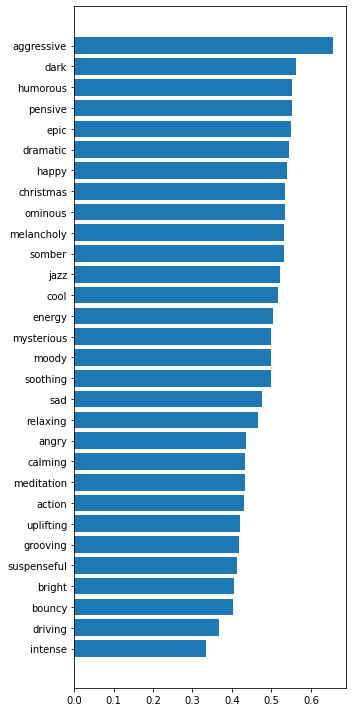

In [ ]:
SAMPLE_RATE = 16000
DATASET = "mtat"
MODEL_NAMES = {
    "CRNN": "crnn",
    "MusiCNN": "musicnn"
}

class Predictor():
    def predict(self, input, variant, output_format):
        key = MODEL
        if TAG_NUM == 30:
          self.tags = np.load("./mtat/30_tags.npy")
        else:
          self.tags = np.load("./mtat/tags.npy")
        
        if variant == 'crnn':
          model = crnn.eval()
          #input_length = 29 * 16000
          input_length = 3 * 16000
        elif variant == "musicnn":
          model = musicnn.eval()
          #input_length = 3 * 16000
          input_length = 5 * 16000
        else:
            print('model_type has to be one of [musicnn, crnn]')

        signal, _ = librosa.core.load(str(input), sr=SAMPLE_RATE)
        length = len(signal)
        hop = length // 2 - input_length // 2
        x = torch.zeros(1, input_length)
        x[0] = torch.Tensor(signal[hop : hop + input_length]).unsqueeze(0)
        x = Variable(x)
        out = model(x)
        result = dict(zip(self.tags, out[0].detach().numpy().tolist()))

        # return result
        result_list = list(sorted(result.items(), key=lambda x: x[1]))
        plt.figure(figsize=[5, 10])
        plt.barh(
            np.arange(len(result_list)), [r[1] for r in result_list], align="center"
        )
        plt.yticks(np.arange(len(result_list)), [r[0] for r in result_list])
        plt.tight_layout()

        print("TAGS of top 5 probability: ")
        for i in range(5):
          print("rank", i+1, ": ", result_list[-i-1][0])

        return result

        # out_path = Path(tempfile.mkdtemp()) / "out.png"
        # plt.savefig(out_path)
        # return out_path

# current directory position (!pwd) should be like below
# content/drive/MyDrive/CS376/split

def _recognize(audio):
  display(Audio(audio, rate=SAMPLE_RATE, autoplay=True))
  wavfile.write('test.wav', SAMPLE_RATE, (32767*audio).astype(np.int16))

  predictor = Predictor()
  predictor.predict('/content/drive/MyDrive/CS376/split/test.wav',
                 MODEL, 'JSON')


def _upload_audio(b):
  clear_output()
  audio = upload_audio(sample_rate=SAMPLE_RATE)
  _recognize(audio)

try:
  _upload_audio("")
except TypeError:
  print("uploading failed")